### Importign the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer,KBinsDiscretizer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso,ElasticNet,SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,PolynomialFeatures,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Lodign CSV file 

house = pd.read_csv("boston_housing_clean.csv")
house.sample(5) # showing the data randomely

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99,7.4
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30,19.2
464,7.83932,0.0,18.10,0,0.655,6.209,65.4,2.9634,24,666.0,20.2,396.90,13.22,21.4
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42,16.4
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666.0,20.2,9.32,26.45,8.7


In [4]:
# statical data analysic

house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Information about the data 

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
x = house.iloc[:,0:13]
y = house.iloc[:,-1]

In [7]:
# Spliting the data in traingn and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [8]:
# Before preprocesing the data 
from sklearn.ensemble import RandomForestRegressor
def model(name_model):
    cf = name_model()
    cf.fit(x_train,y_train)
    cf.fit(x_train,y_train)
                                                                                                            
    y_pred = cf.predict(x_test)     
    
    print("mean squarred error",mean_squared_error(y_test,y_pred))                                                                                                      
    print("mean absult error",mean_squared_error(y_test,y_pred))                                                                                                        
    print("RMAA",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("r2_score",r2_score(y_test,y_pred))
    print("adjust r2",1-(1-r2_score(y_test,y_pred))*(152 - 1)/(152-13-1))
                                                                                                                

In [9]:
model(RandomForestRegressor)

mean squarred error 9.052005703947373
mean absult error 9.052005703947373
RMAA 3.0086551321059334
r2_score 0.8785179217832556
adjust r2 0.8670739578932725


In [10]:
# Before preprocesing the data 
def model(name_model):
    cf = name_model()
    cf.fit(x_train,y_train)
    cf.fit(x_train,y_train)
                                                                                                            
    y_pred = cf.predict(x_test)                                                                                                            
    print("mean squarred error",mean_squared_error(y_test,y_pred))                                                                                                      
    print("mean absult error",mean_squared_error(y_test,y_pred))                                                                                                        
    print("RMAA",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("r2_score",r2_score(y_test,y_pred))
    print("adjust r2",1-(1-r2_score(y_test,y_pred))*(152 - 1)/(152-13-1))
                                                                                                                

In [11]:
n = [LinearRegression,Ridge,Lasso]

In [12]:
for i in n:
    print(i)
    model(i)
    print("")

<class 'sklearn.linear_model._base.LinearRegression'>
mean squarred error 21.51744423117734
mean absult error 21.51744423117734
RMAA 4.638689926172835
r2_score 0.7112260057484915
adjust r2 0.6840226584639291

<class 'sklearn.linear_model._ridge.Ridge'>
mean squarred error 22.044053089861006
mean absult error 22.044053089861006
RMAA 4.695109486461525
r2_score 0.7041586727559435
adjust r2 0.6762895622184599

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
mean squarred error 25.63950292804399
mean absult error 25.63950292804399
RMAA 5.06354647732634
r2_score 0.655906082915434
adjust r2 0.6234914385523951



In [13]:
# Before preprocesing the data and applying the plynoimalfeature
def model1(name_model,alpha):
    poly = PolynomialFeatures(degree=2)
    x_train_trf = poly.fit_transform(x_train)
    x_test_trf = poly.transform(x_test)
    cf = name_model(alpha)
    
    cf.fit(x_train_trf,y_train)
    
                                                                                                            
    y_pred = cf.predict(x_test_trf)                                                                                                            
    print("mean squarred error",mean_squared_error(y_test,y_pred))                                                                                                      
    print("mean absult error",mean_squared_error(y_test,y_pred))                                                                                                        
    print("RMAA",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("r2_score",r2_score(y_test,y_pred))
    print("adjust r2",1-(1-r2_score(y_test,y_pred))*(152 - 1)/(152-13-1))
                                                                                                                

In [14]:
for i in n:
    print(i)
    model(i)
    print("")

<class 'sklearn.linear_model._base.LinearRegression'>
mean squarred error 21.51744423117734
mean absult error 21.51744423117734
RMAA 4.638689926172835
r2_score 0.7112260057484915
adjust r2 0.6840226584639291

<class 'sklearn.linear_model._ridge.Ridge'>
mean squarred error 22.044053089861006
mean absult error 22.044053089861006
RMAA 4.695109486461525
r2_score 0.7041586727559435
adjust r2 0.6762895622184599

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
mean squarred error 25.63950292804399
mean absult error 25.63950292804399
RMAA 5.06354647732634
r2_score 0.655906082915434
adjust r2 0.6234914385523951



### Doing the preprocessing an the data set


In [15]:
import copy
house1 = copy.deepcopy(house)
print(house1.isnull().sum())
print()
print("duplicated is :",house1.duplicated().sum())
print()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

duplicated is : 0



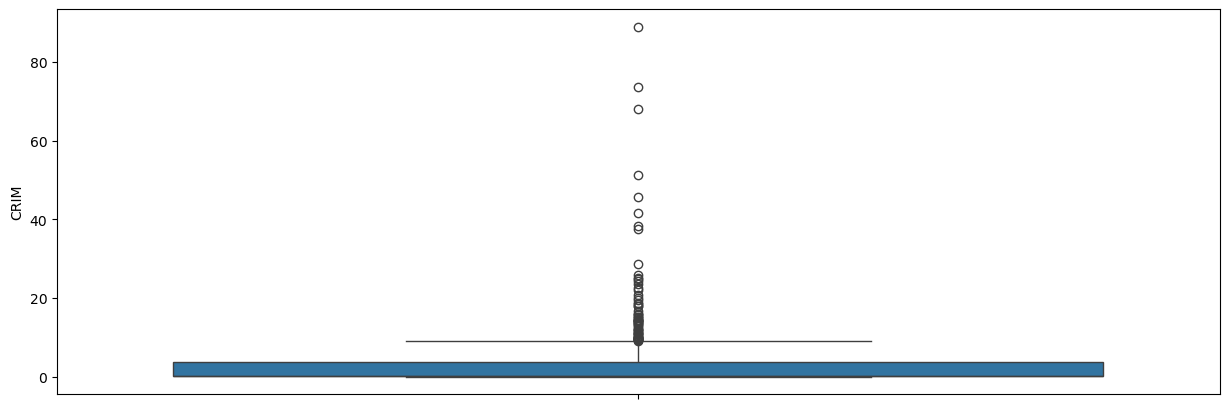

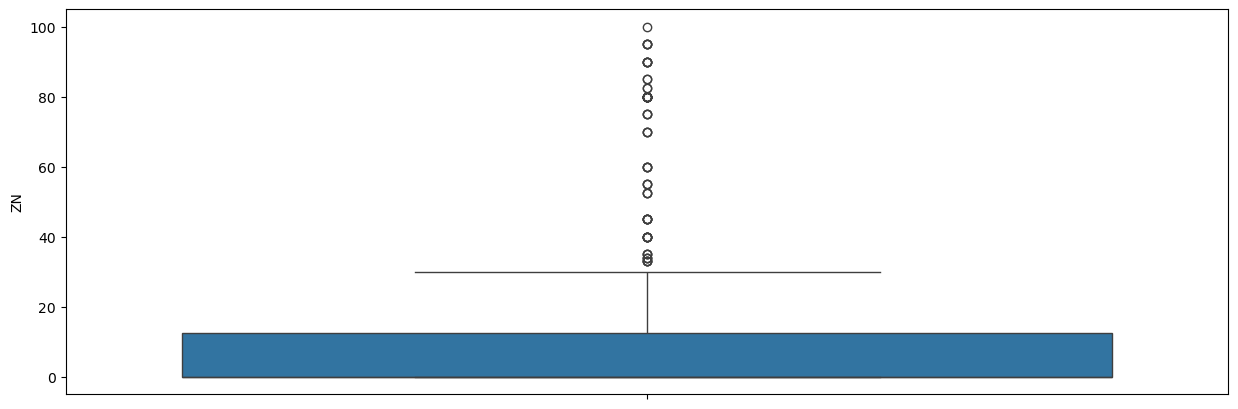

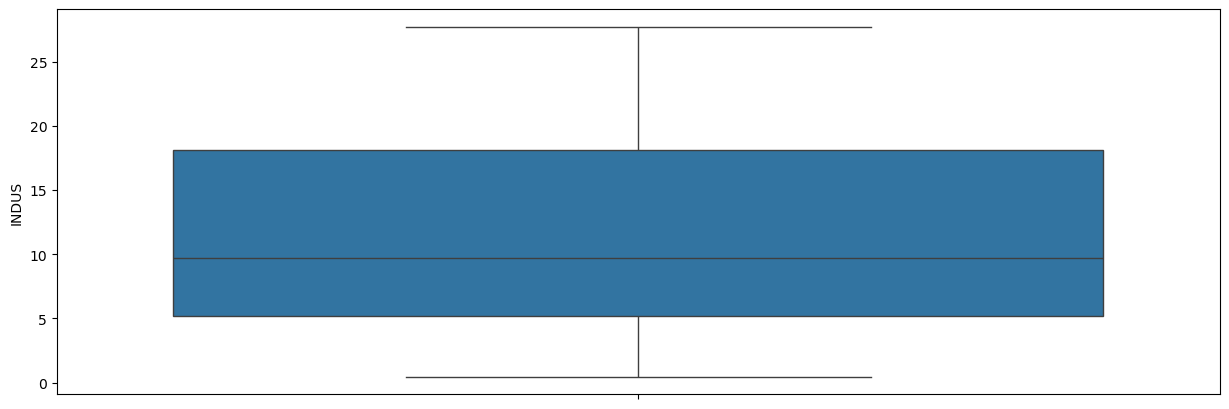

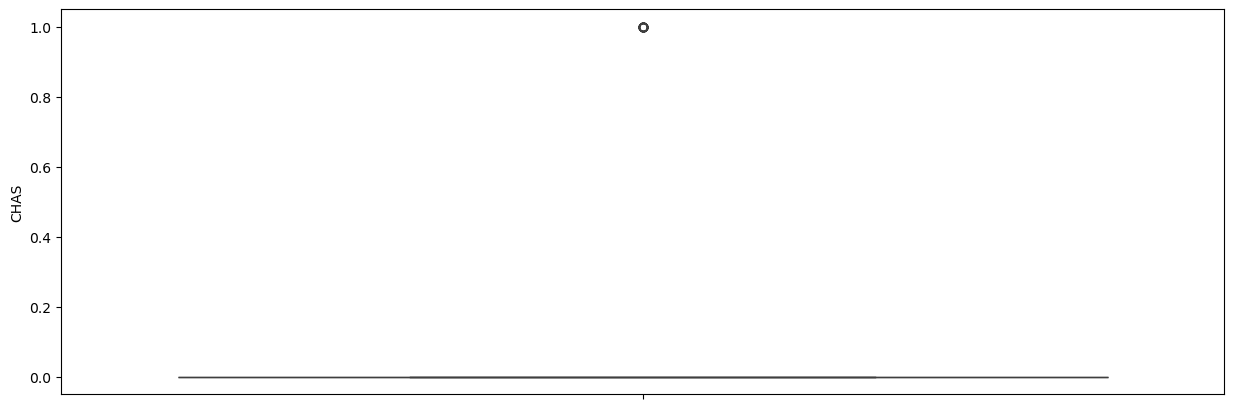

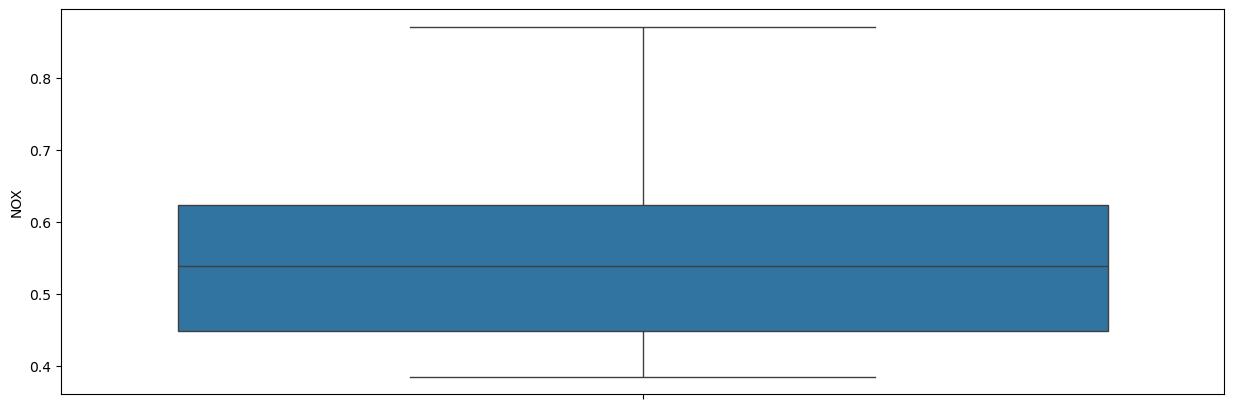

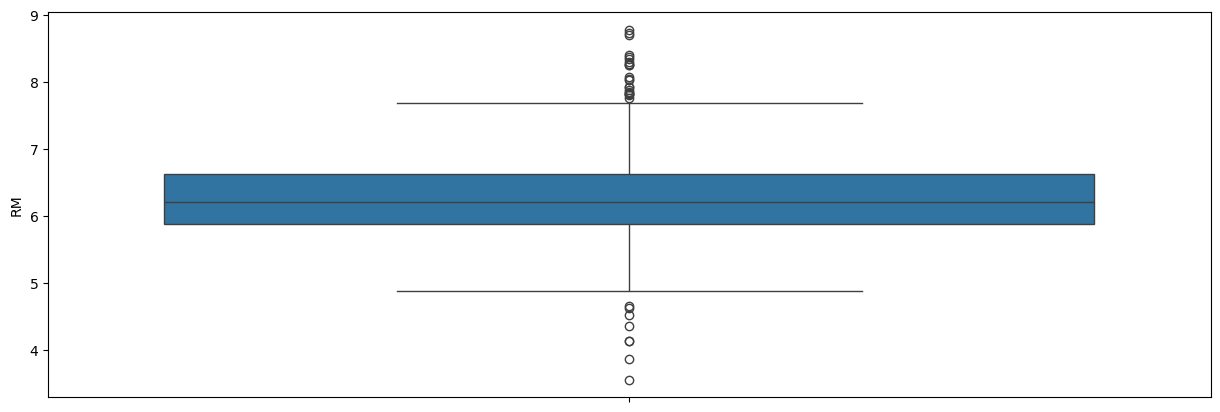

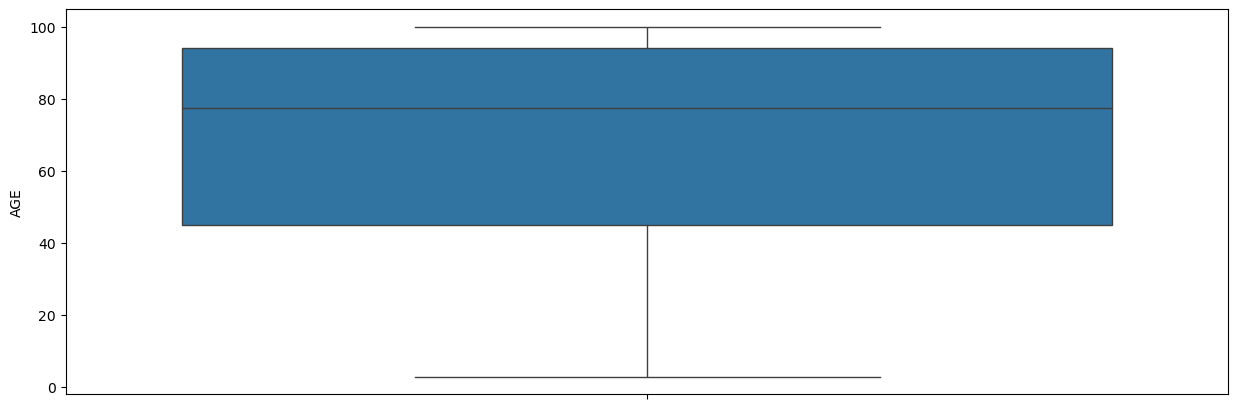

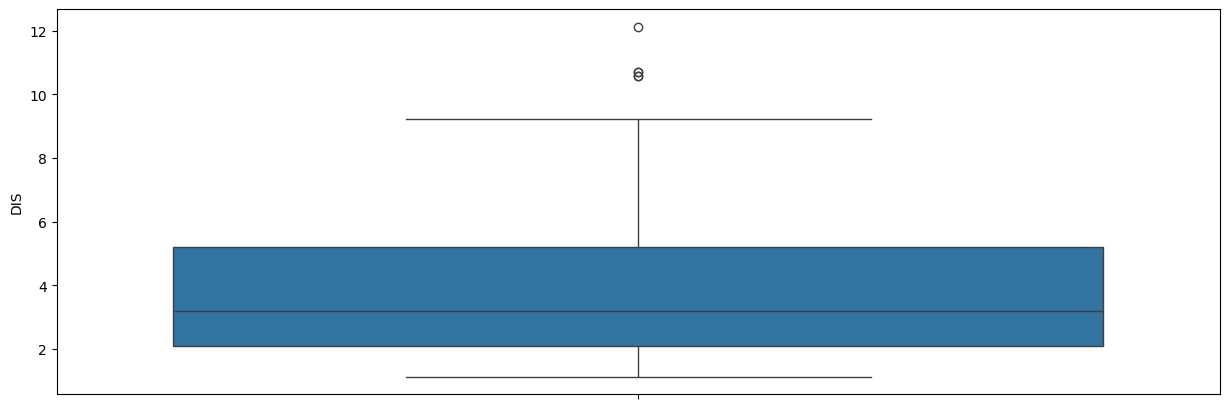

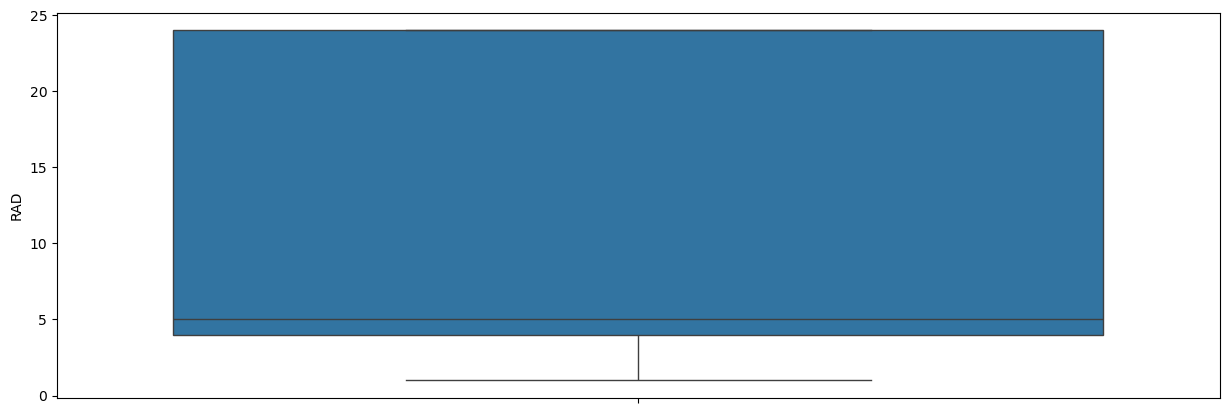

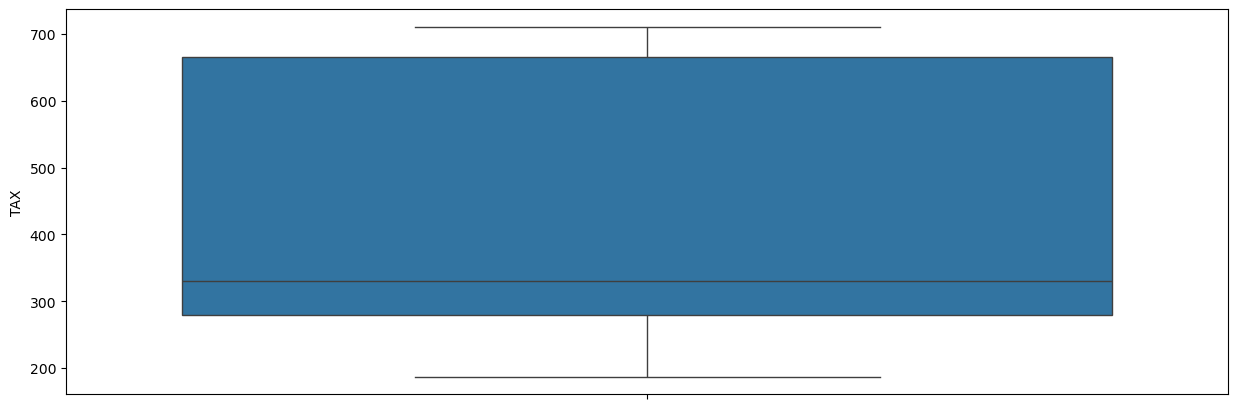

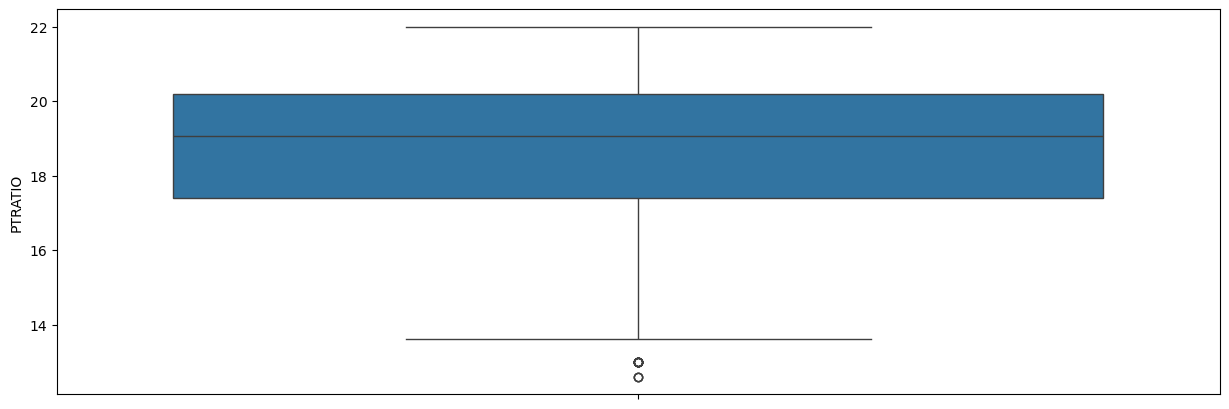

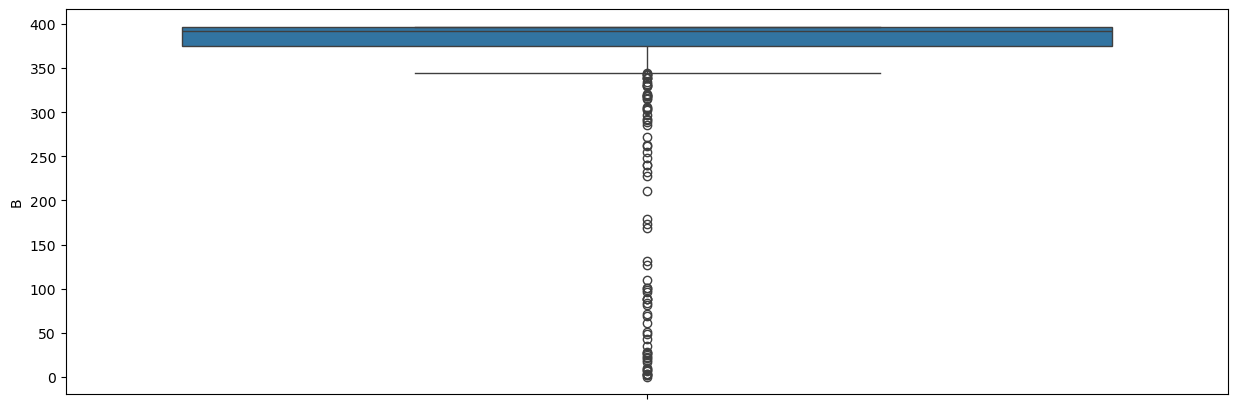

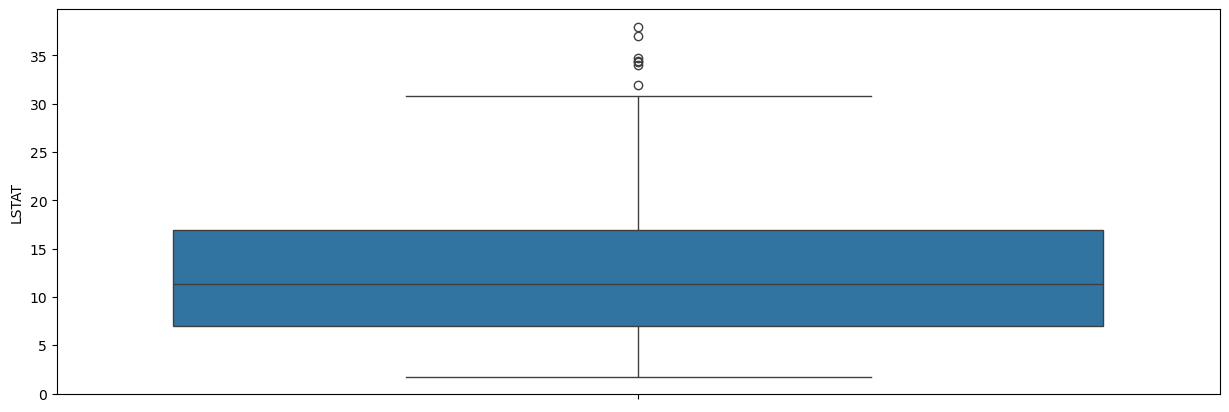

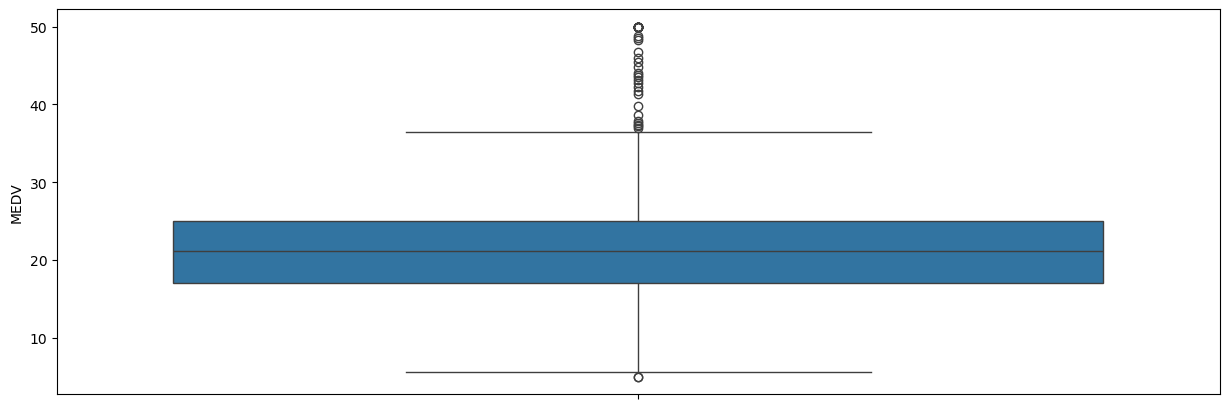

In [16]:
# visulation using the box plot to find the outiler
for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.boxplot(house1[col])

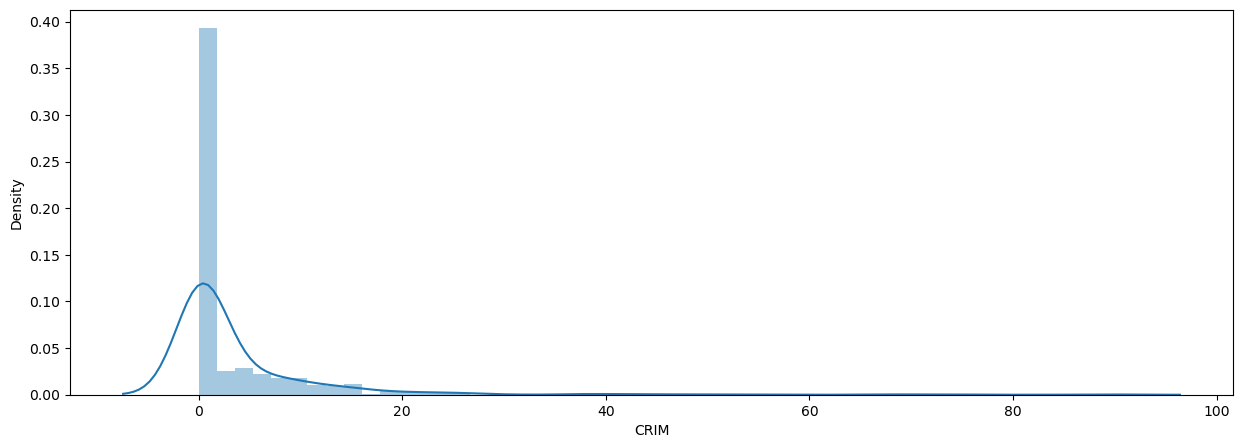

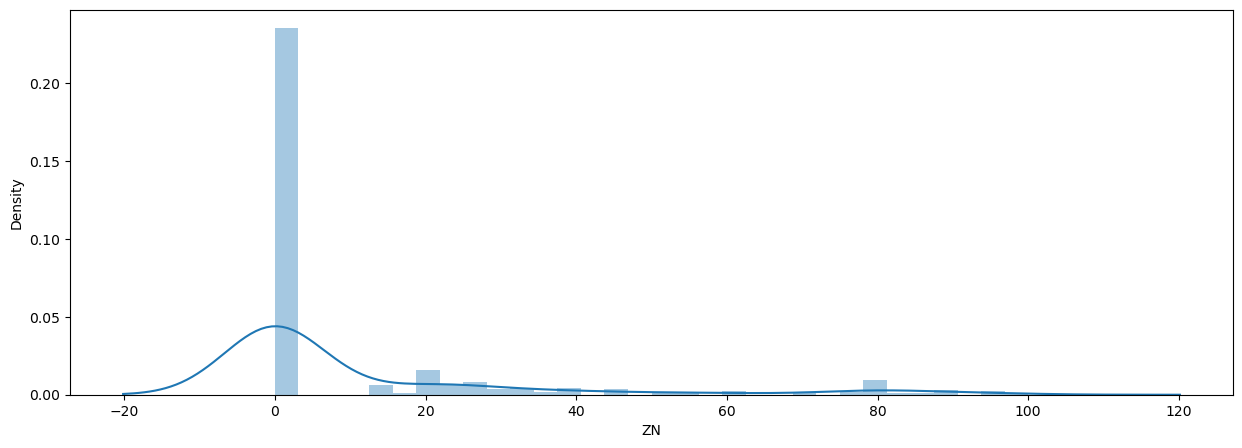

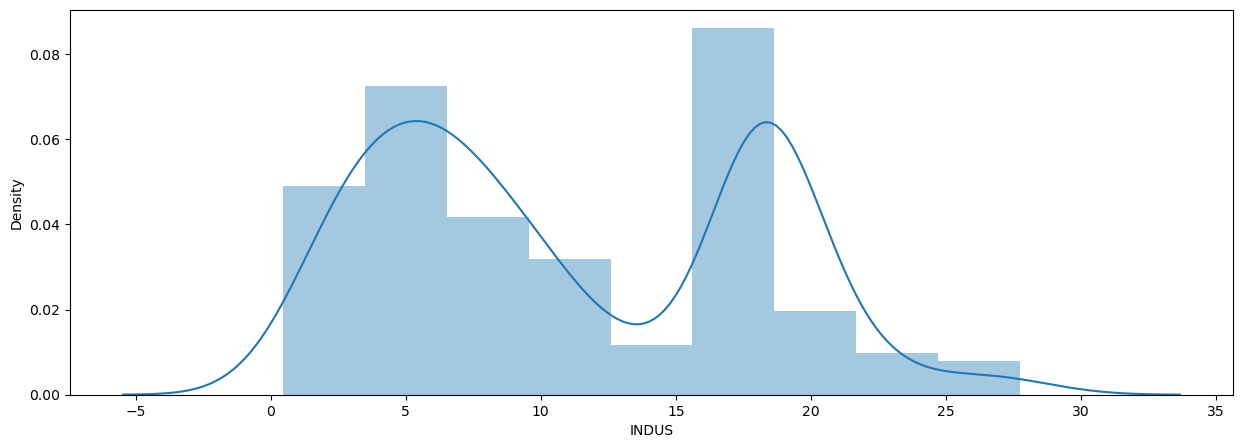

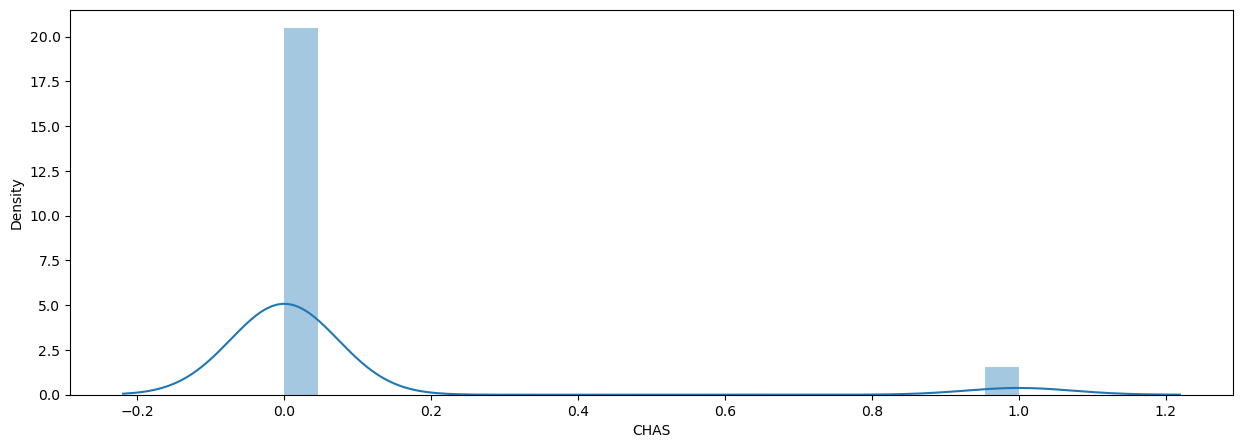

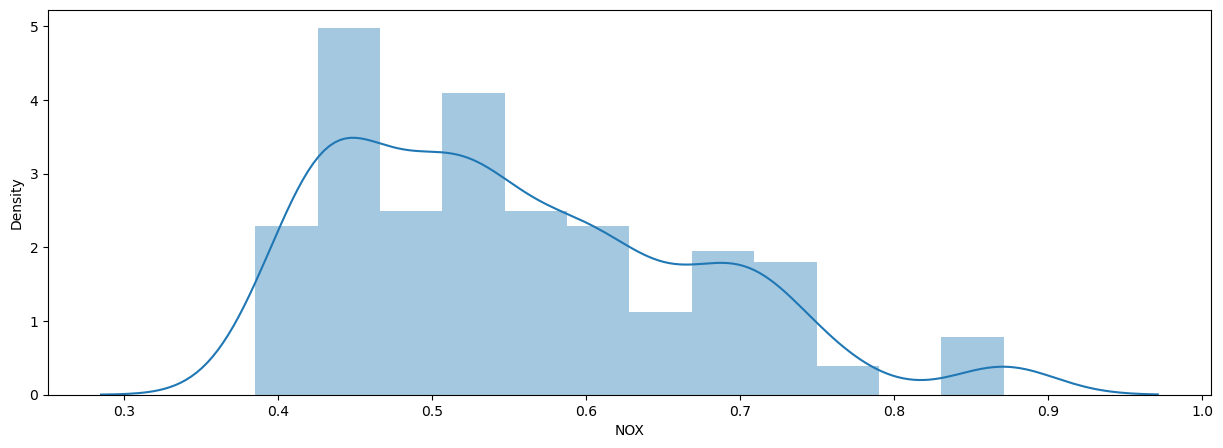

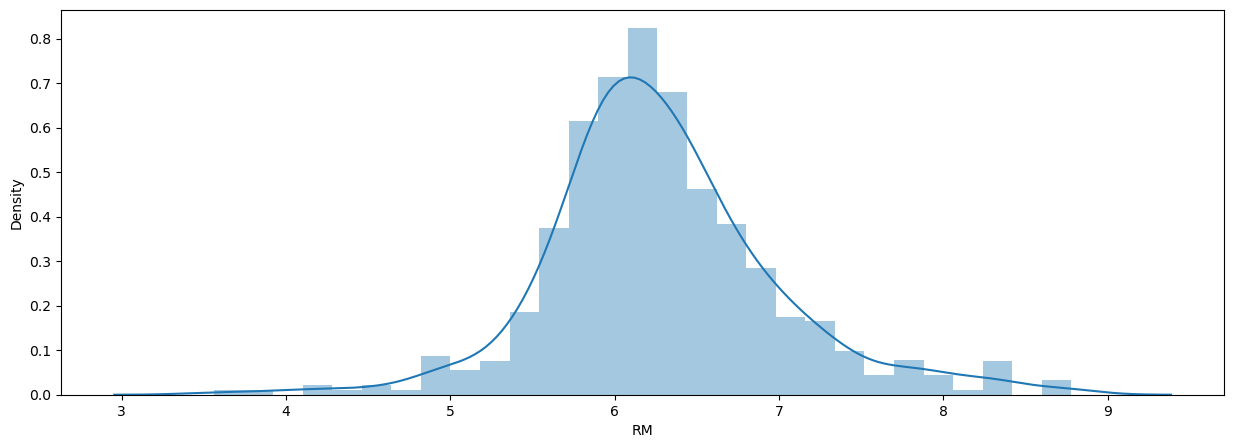

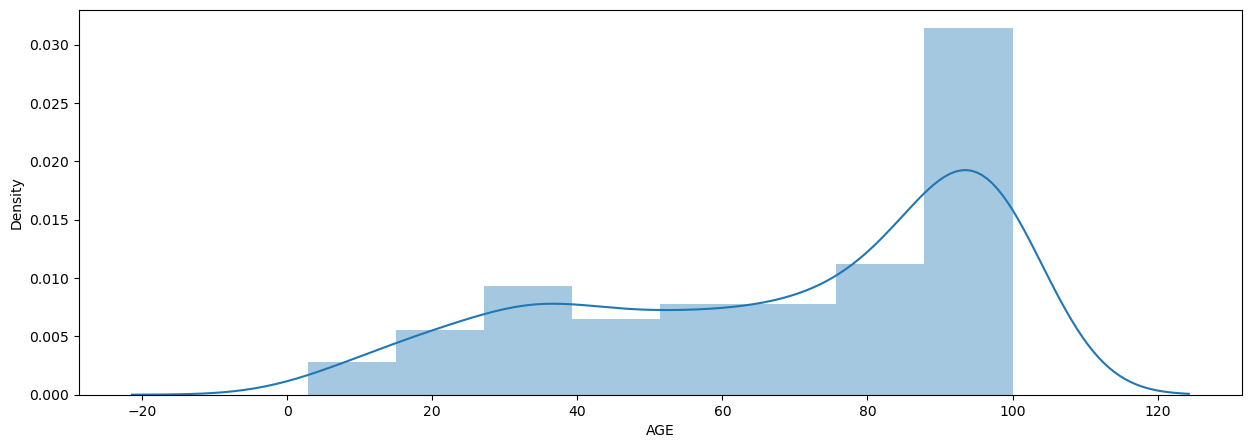

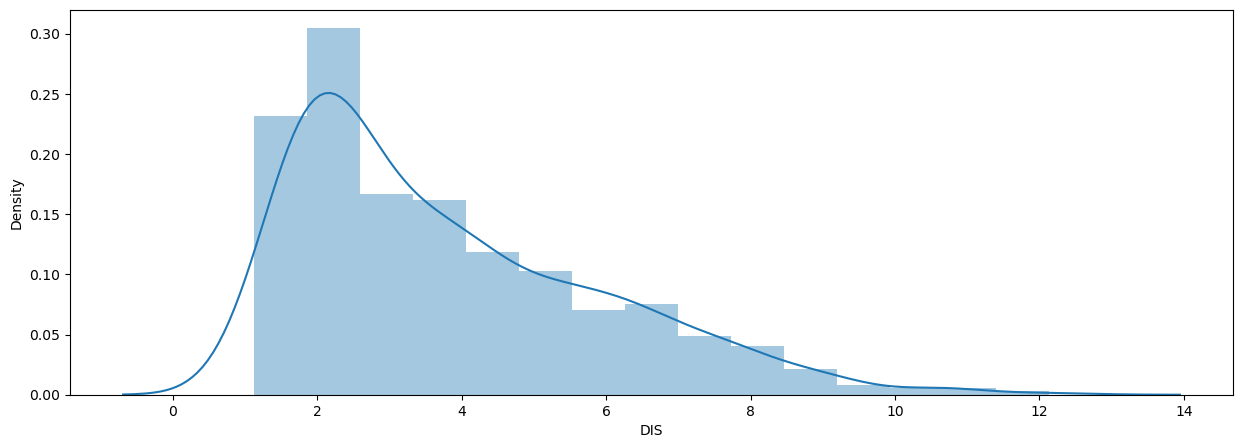

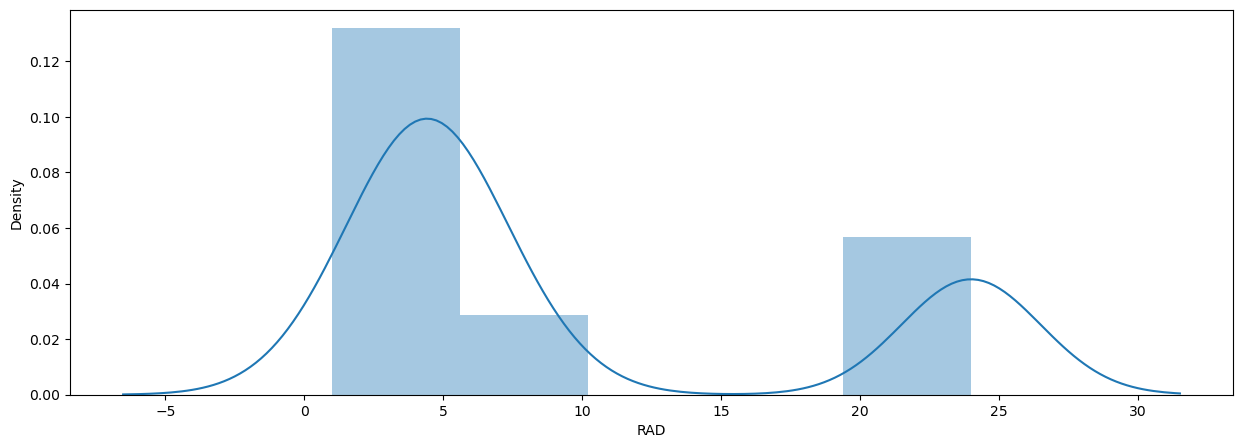

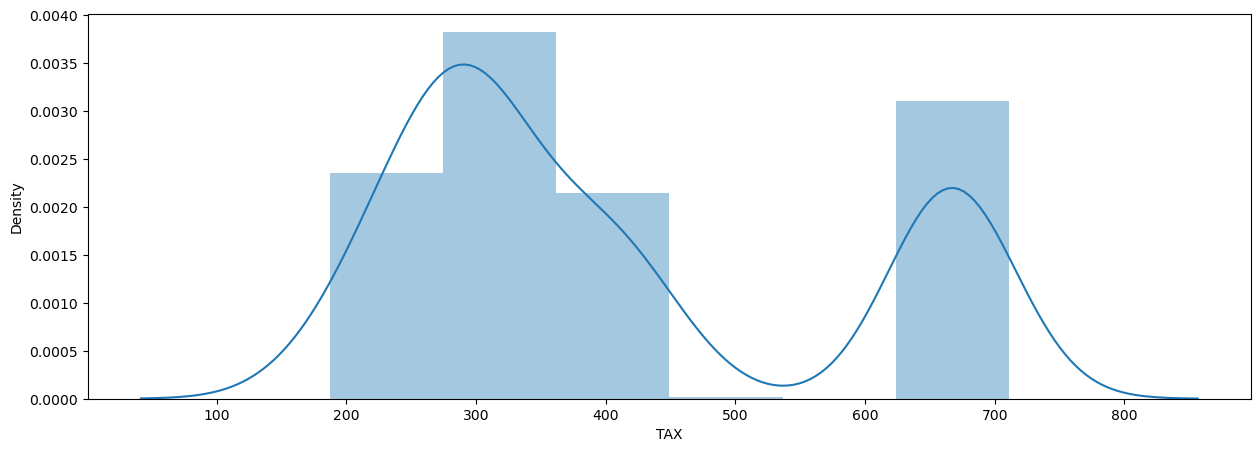

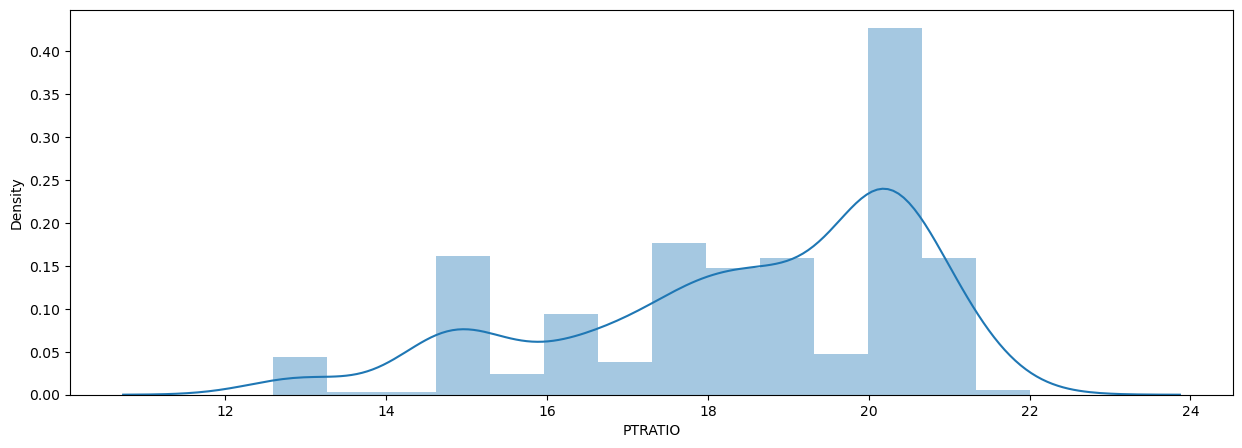

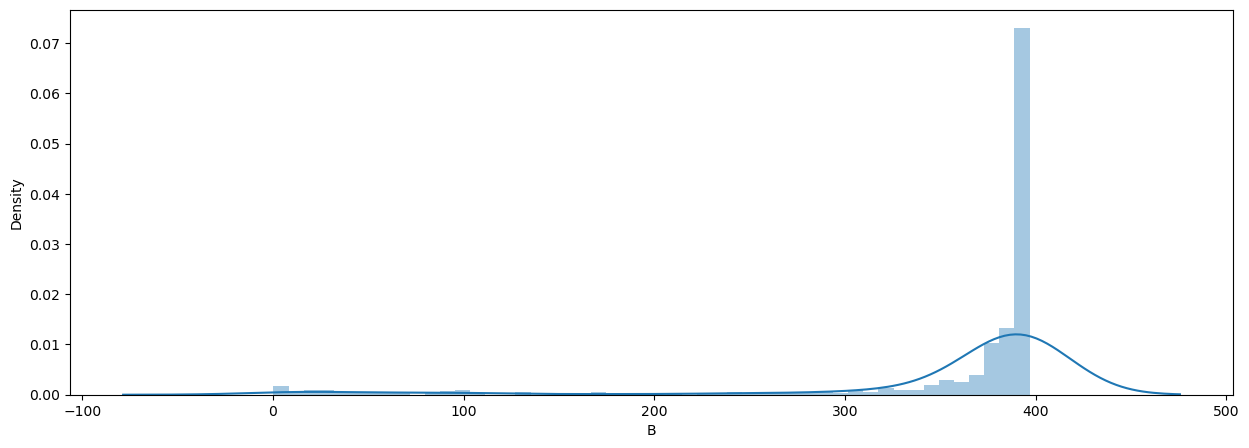

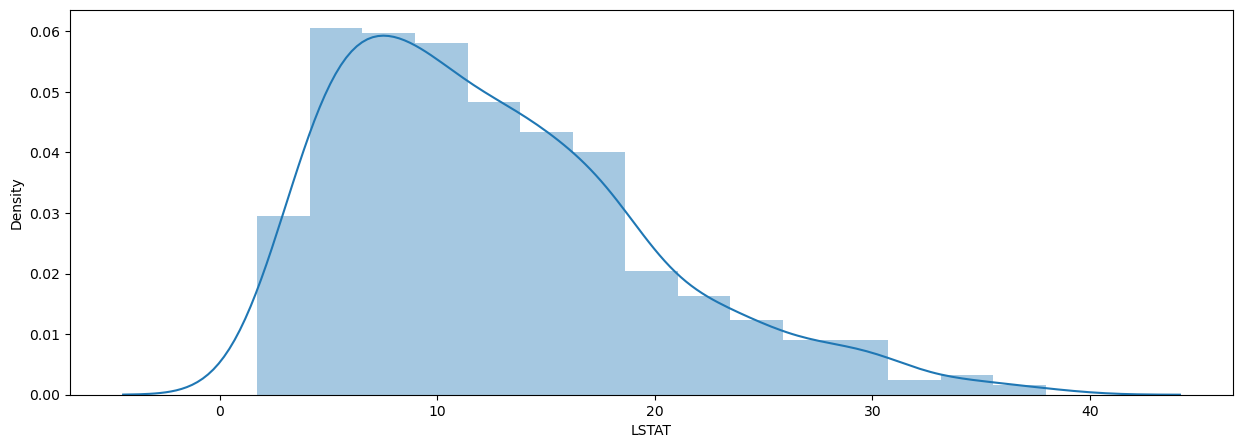

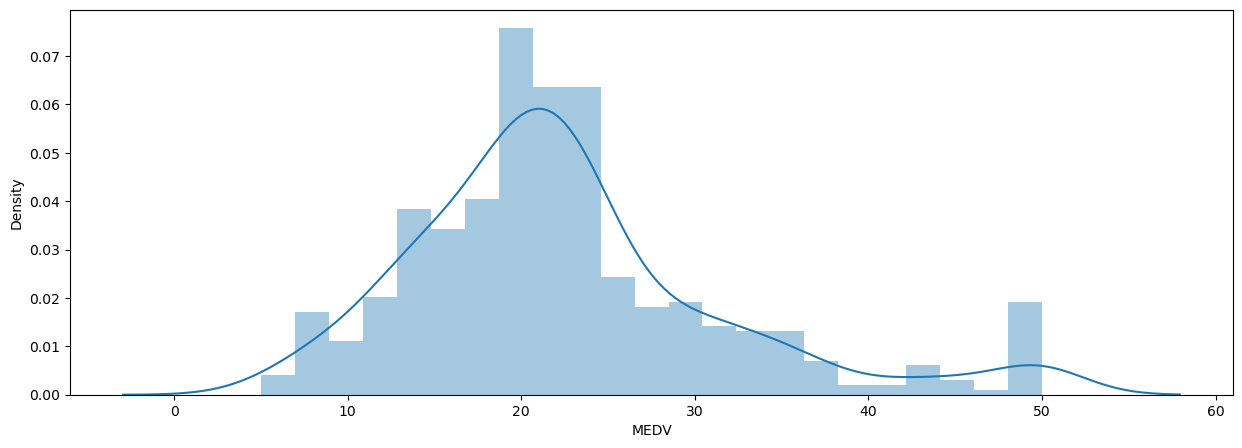

In [17]:
# visulation using the dist plot to find the outiler
import warnings
warnings.filterwarnings("ignore")
for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.distplot(house1[col])

In [18]:
def iqr_range(col):
    # Calculate the first and third quartiles of the column
    Q1 = house1[col].quantile(0.25)
    Q3 = house1[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    # Values below are set to lower_bound, above are set to upper_bound
    house1[col] = np.where(
        house1[col] < lower_bound, lower_bound,
        np.where(house1[col] > upper_bound, upper_bound, house1[col])
    )

In [19]:
def Z_score(col):
    # Define the upper and lower bounds using Z-score method (±3 standard deviations from mean)
    upper_bound = house1[col].mean() + 3 * house1[col].std()
    lower_bound = house1[col].mean() - 3 * house1[col].std()
    
    # Cap values outside the Z-score range
    # Values below the lower bound are set to lower_bound
    # Values above the upper bound are set to upper_bound
    house1[col] = np.where(
        house1[col] < lower_bound, lower_bound,
        np.where(house1[col] > upper_bound, upper_bound, house1[col])
    )

In [20]:
importance_cols = ["CRIM","ZN","RM","DIS","PTRATIO","B","LSTAT","MEDV"]
importance_cols1 = ["INDUS","NOX","AGE","TAX"]

In [21]:
# Removing the outiler

for col in importance_cols:
    iqr_range(col)
    
# Commonly removes points with Z-score beyond ±3 (i.e., more than 3 standard deviations from mean).

for cols in importance_cols1:
    Z_score(cols)

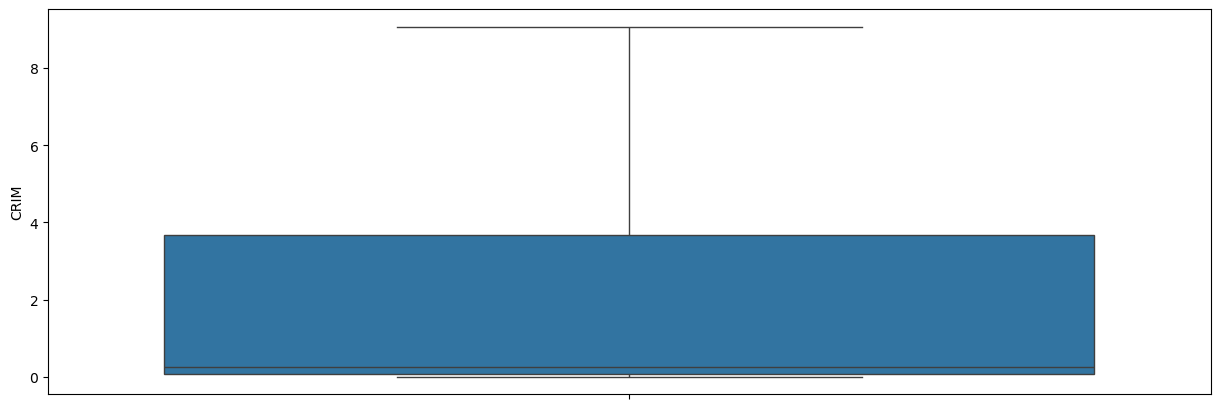

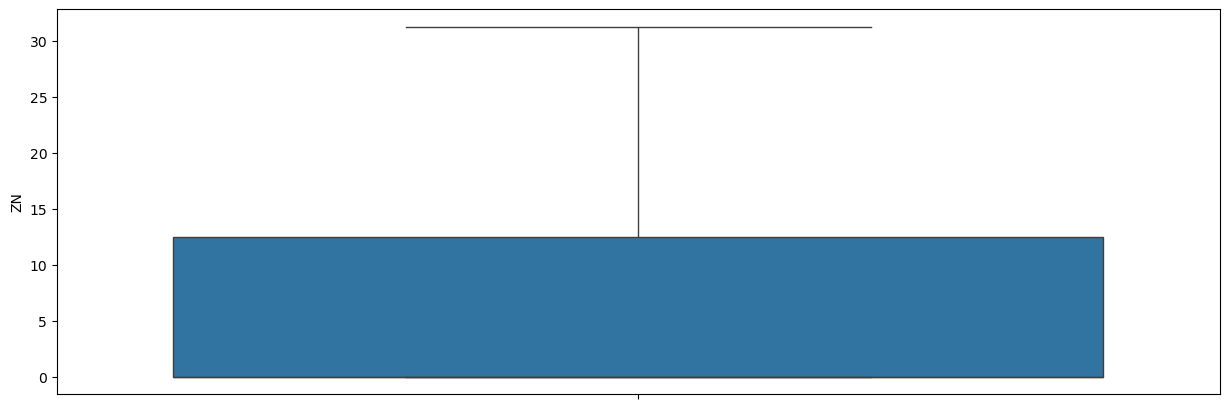

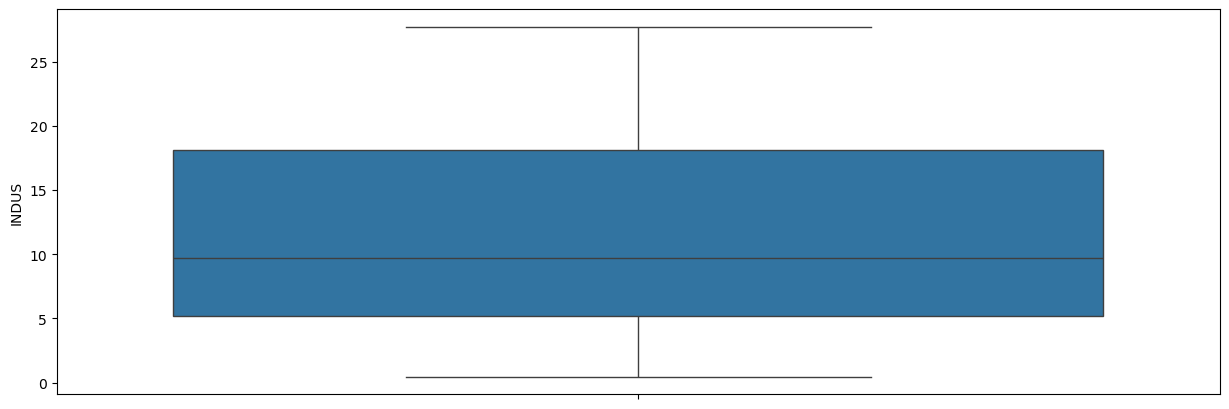

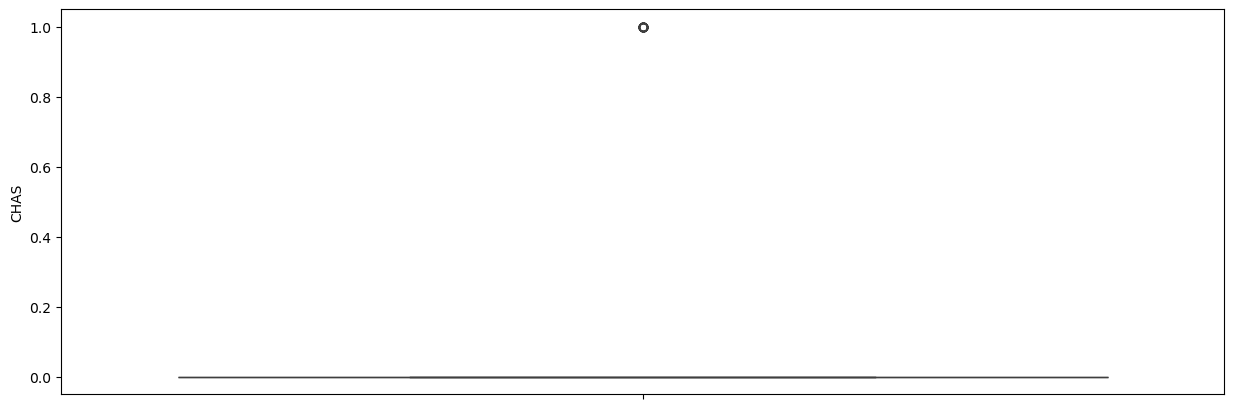

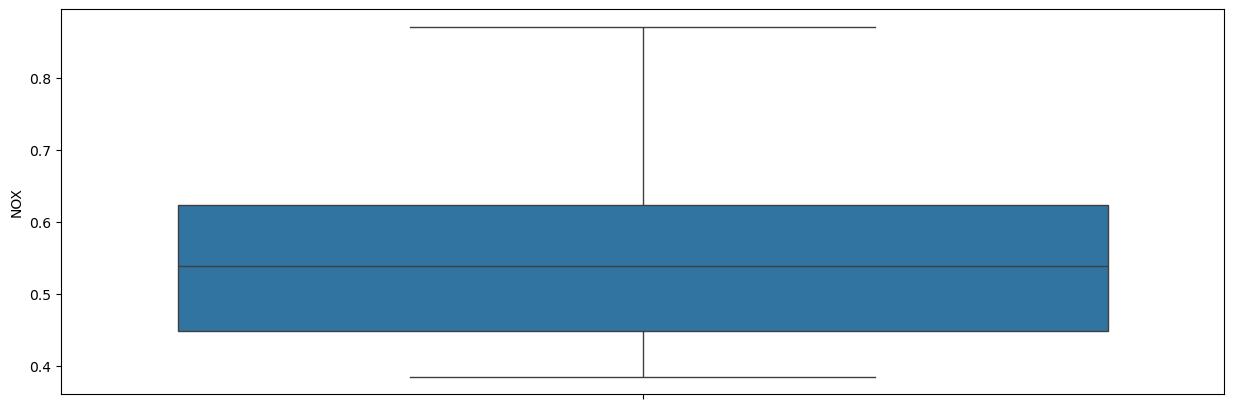

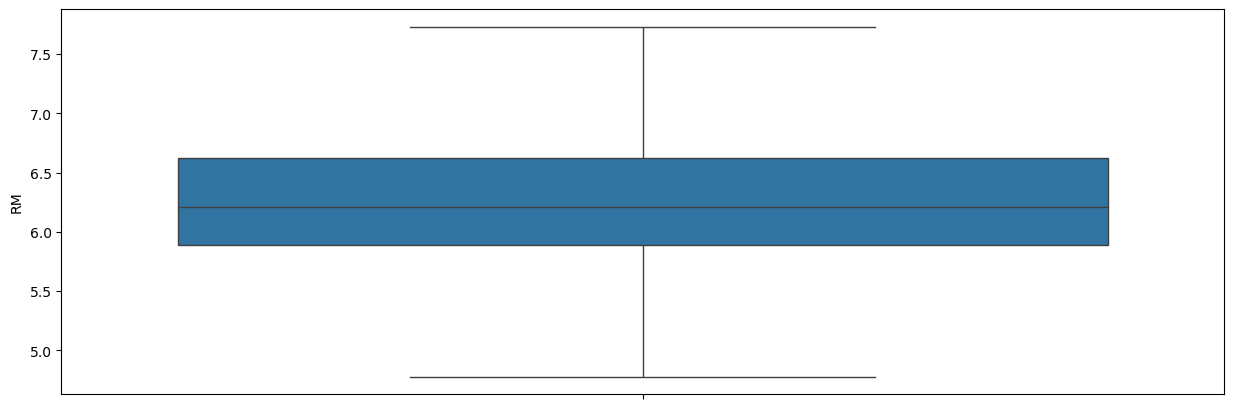

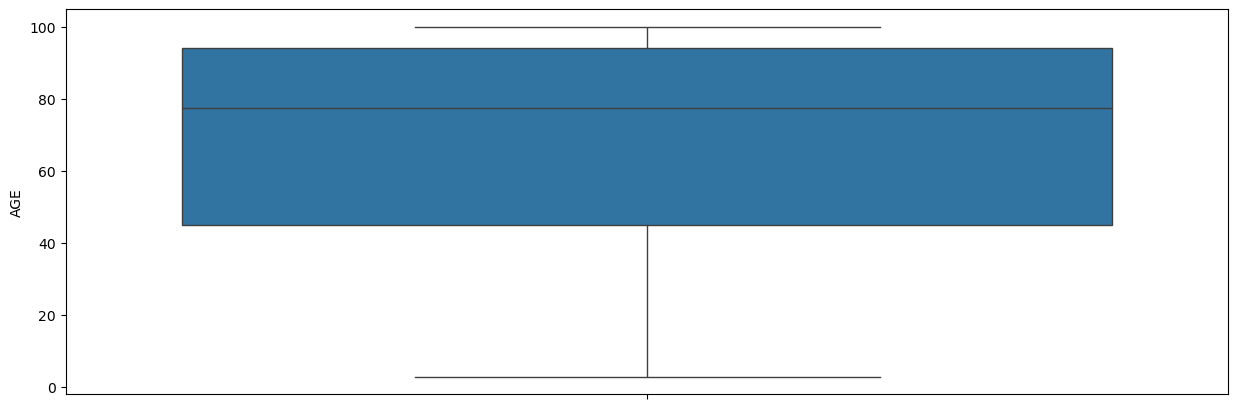

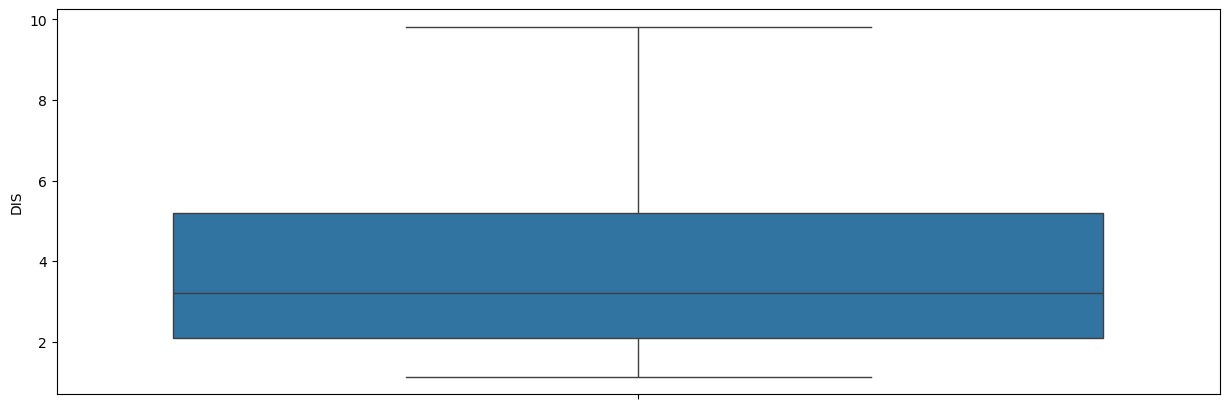

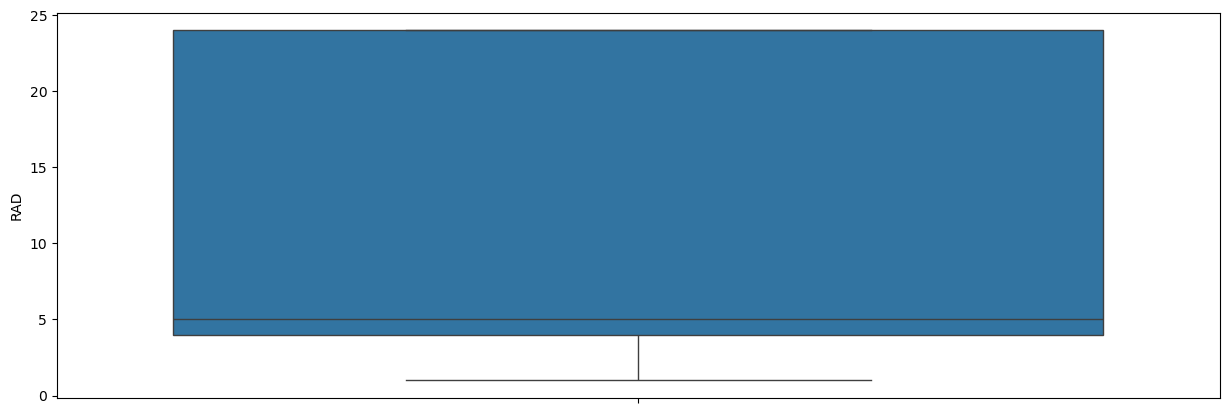

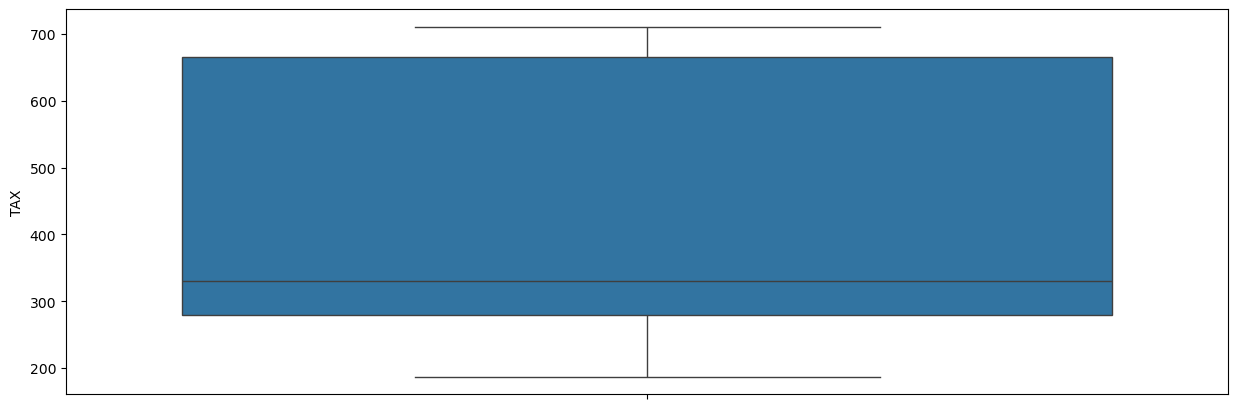

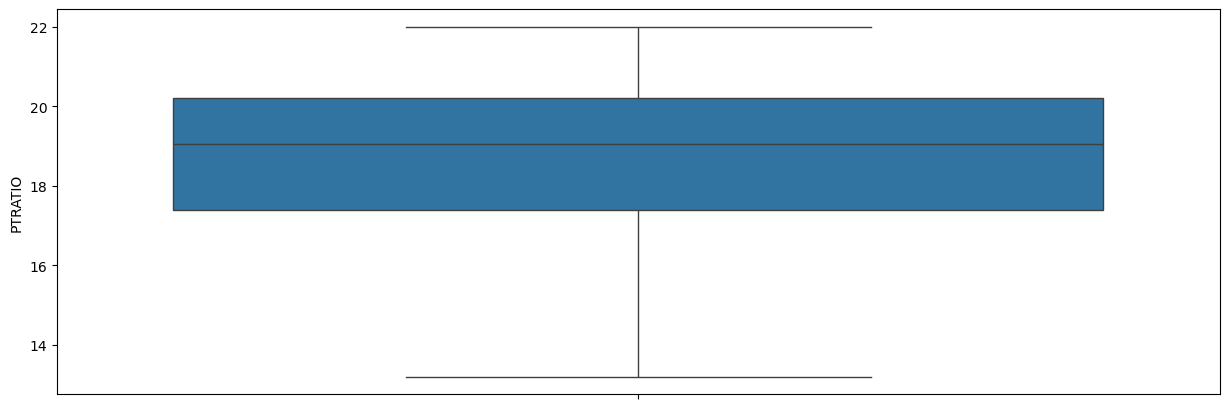

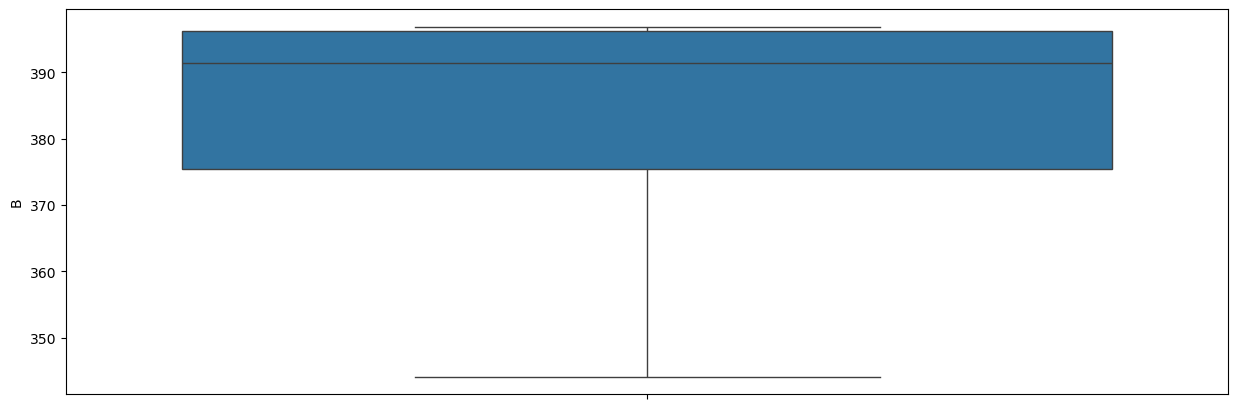

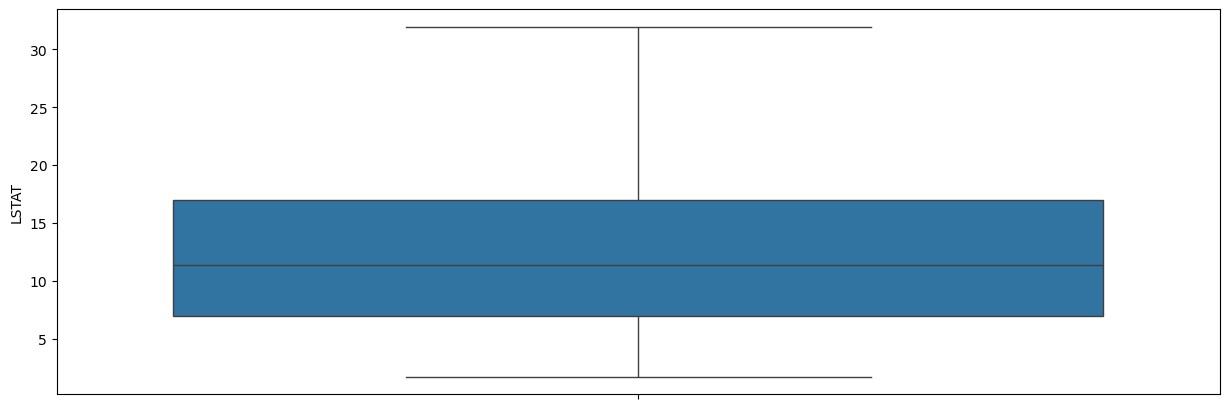

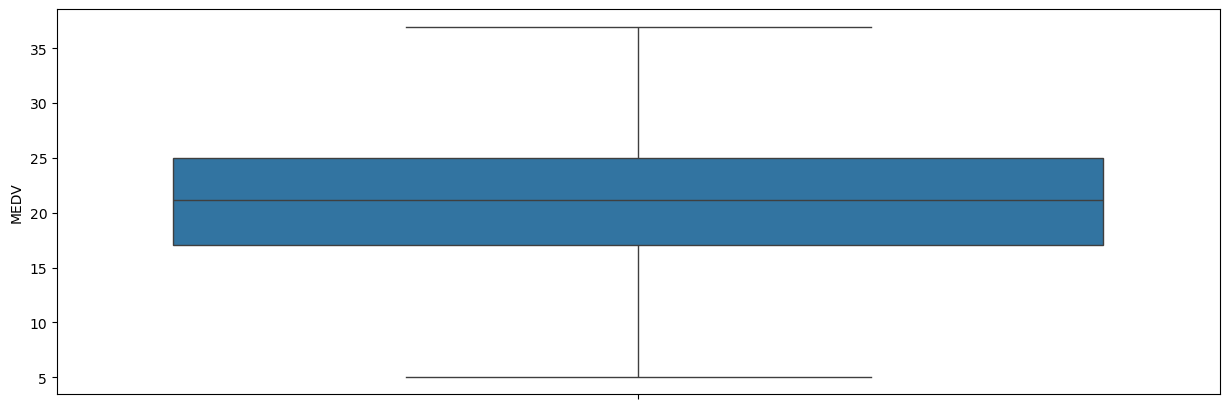

In [22]:
# Afterapplying the removing the outilr
# visulation using the box plot

for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.boxplot(house1[col])

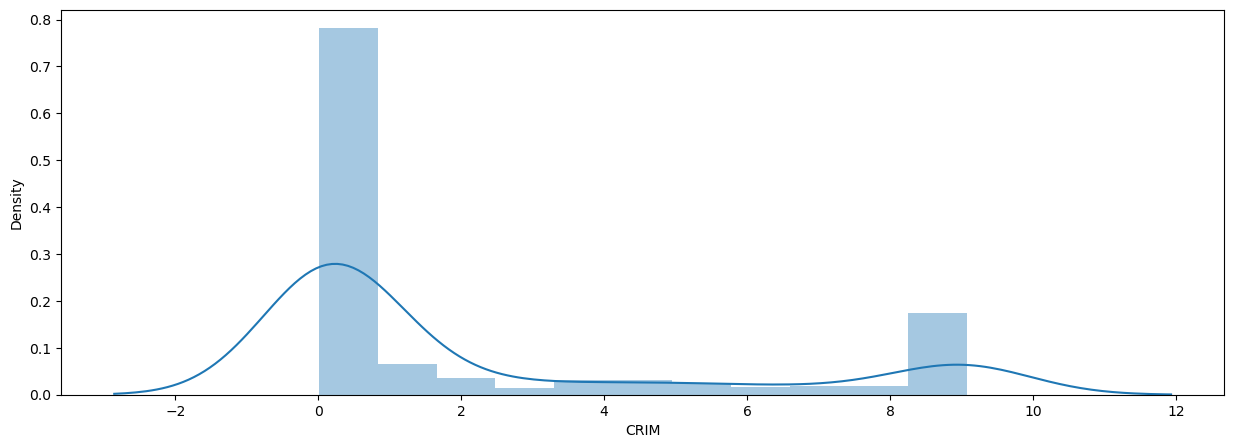

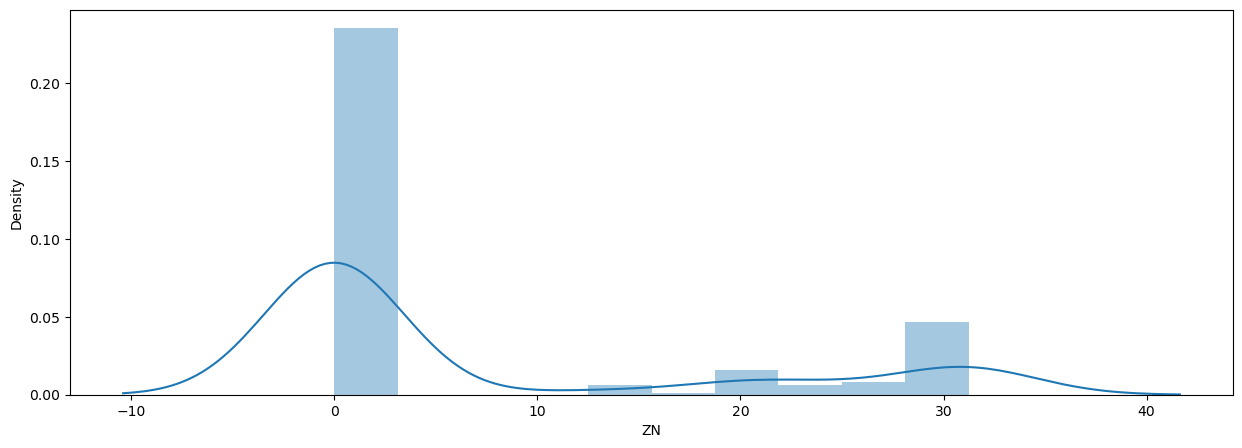

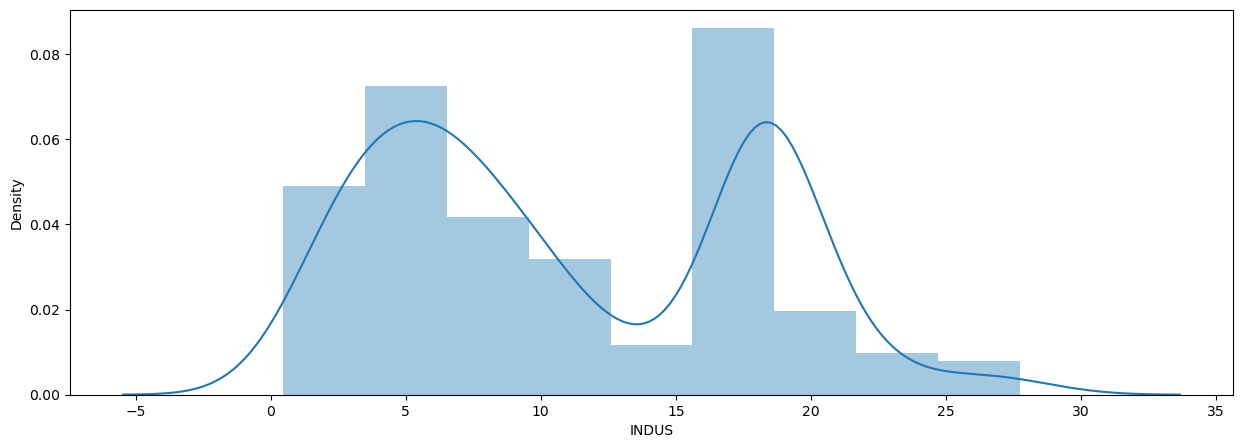

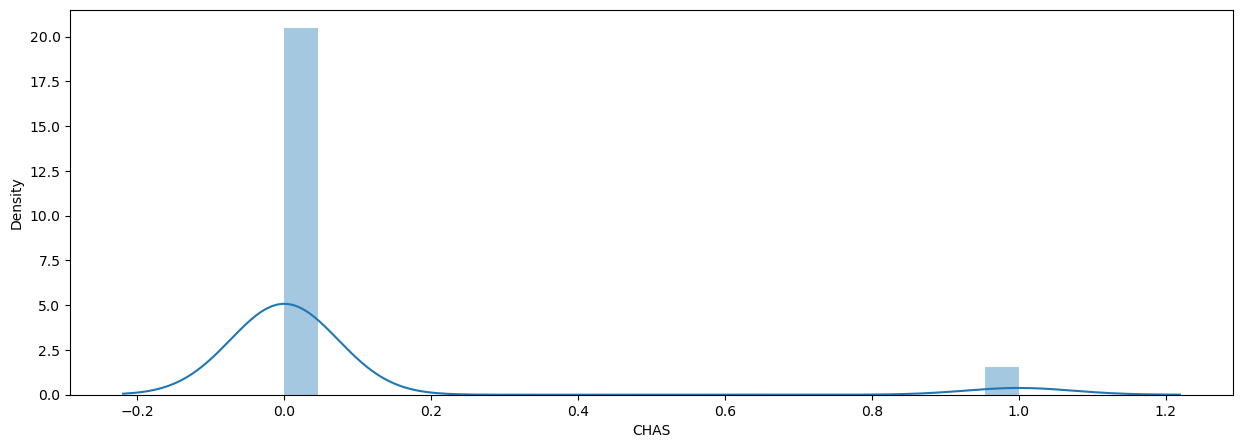

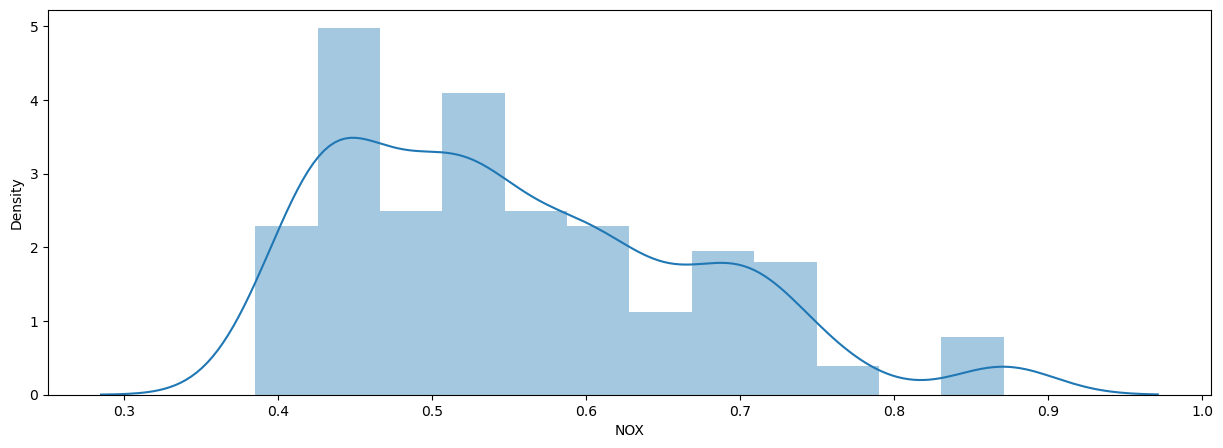

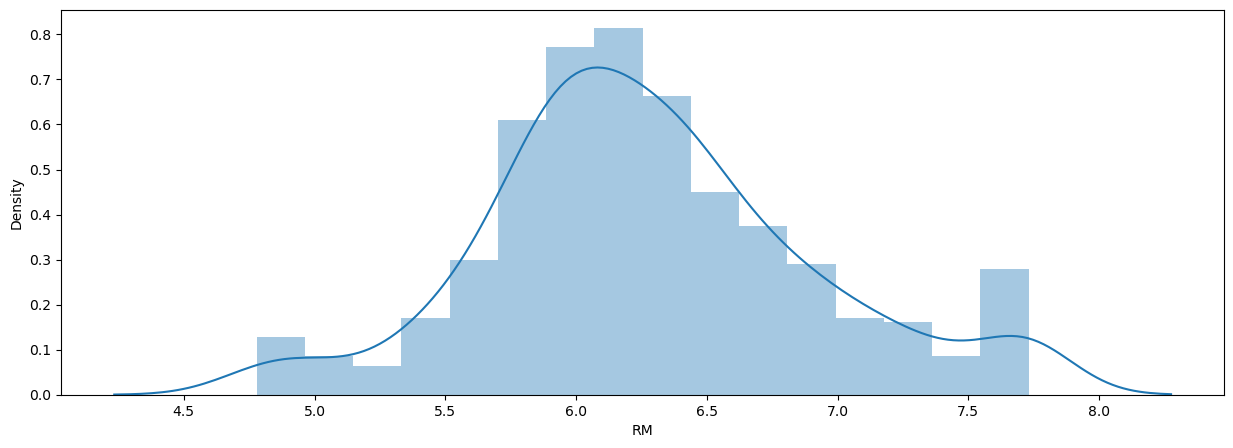

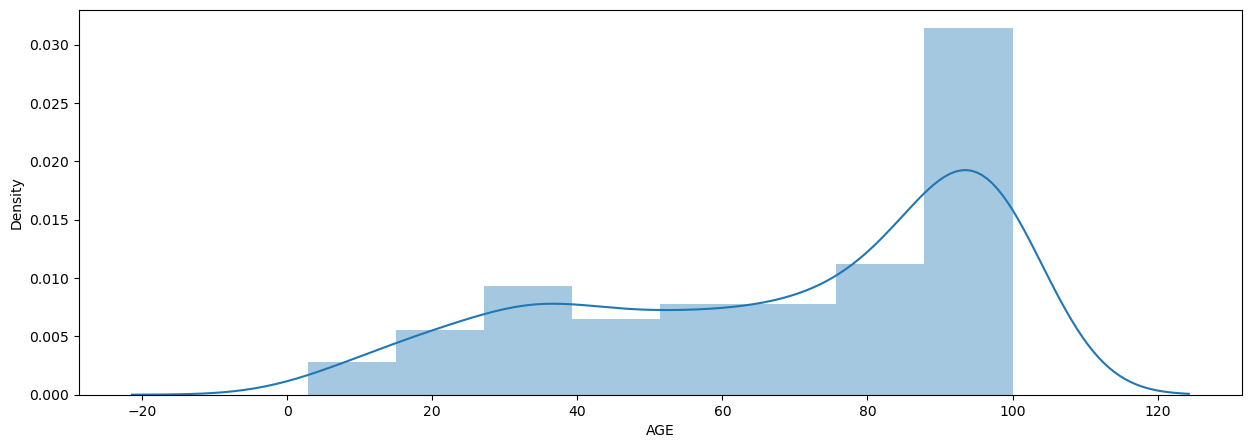

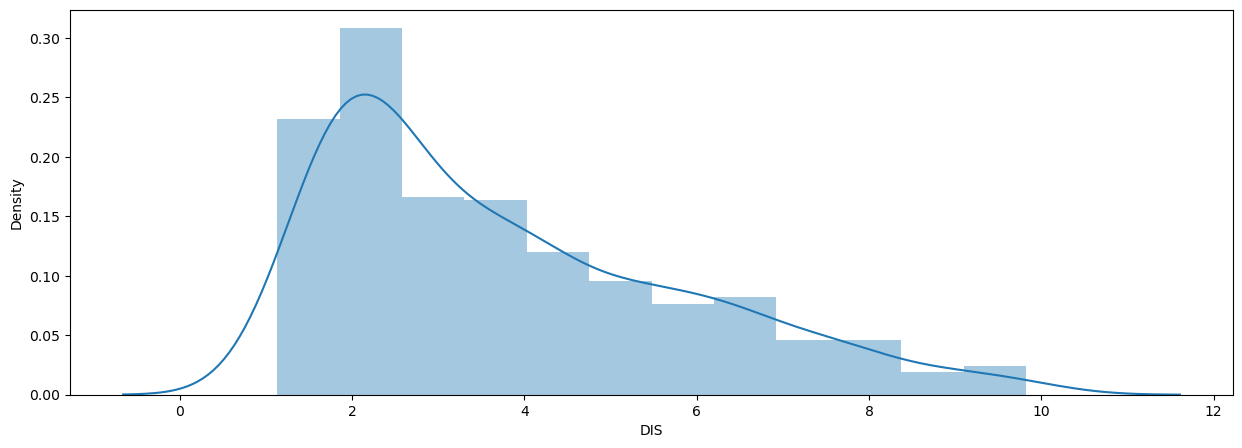

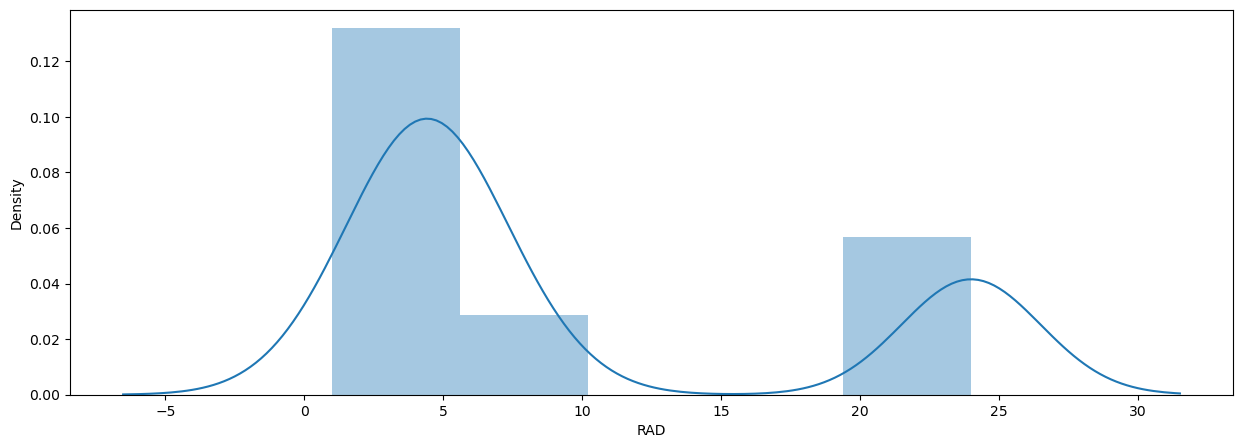

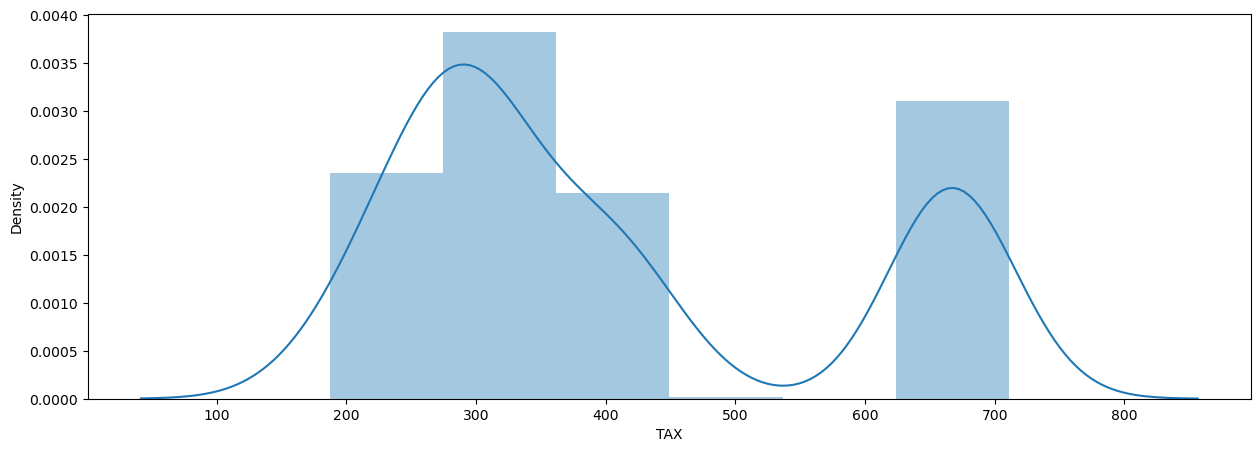

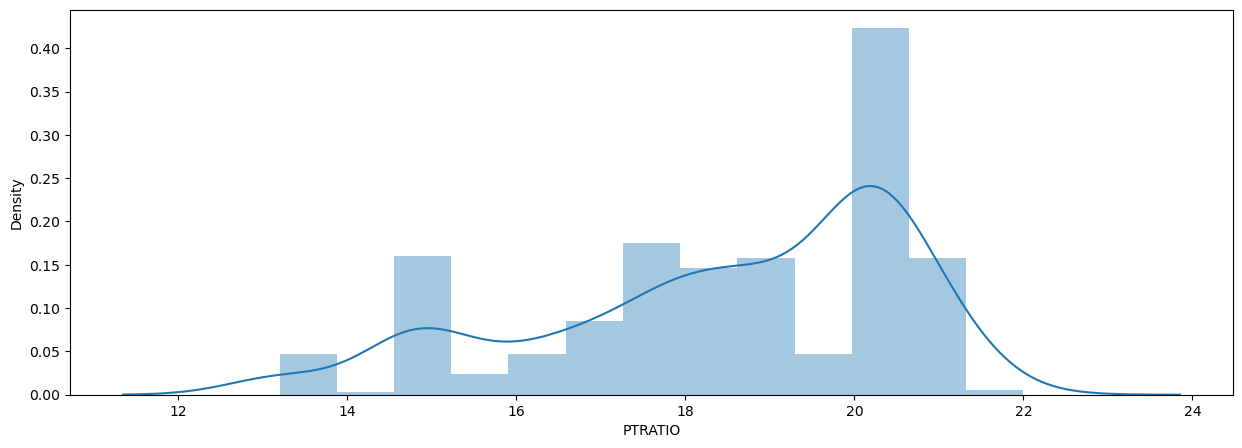

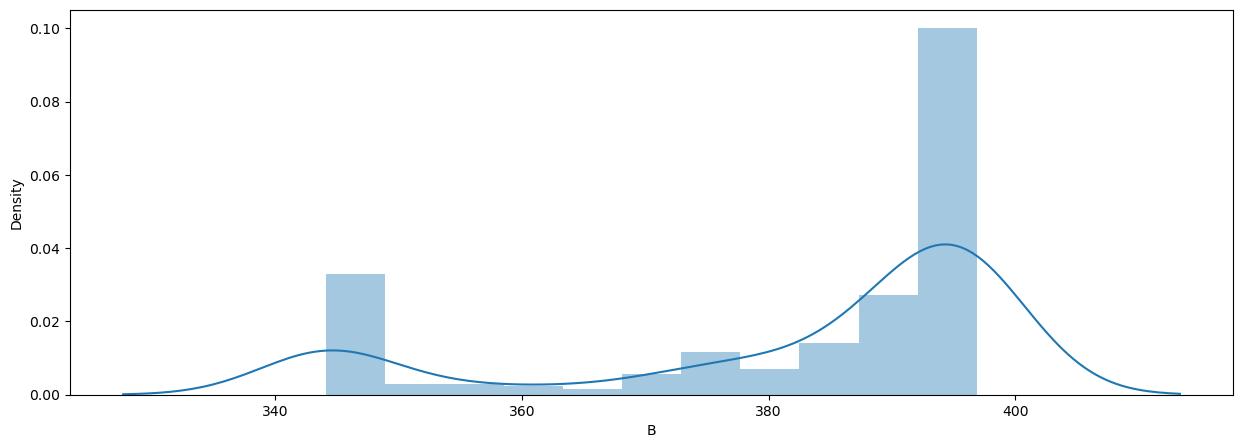

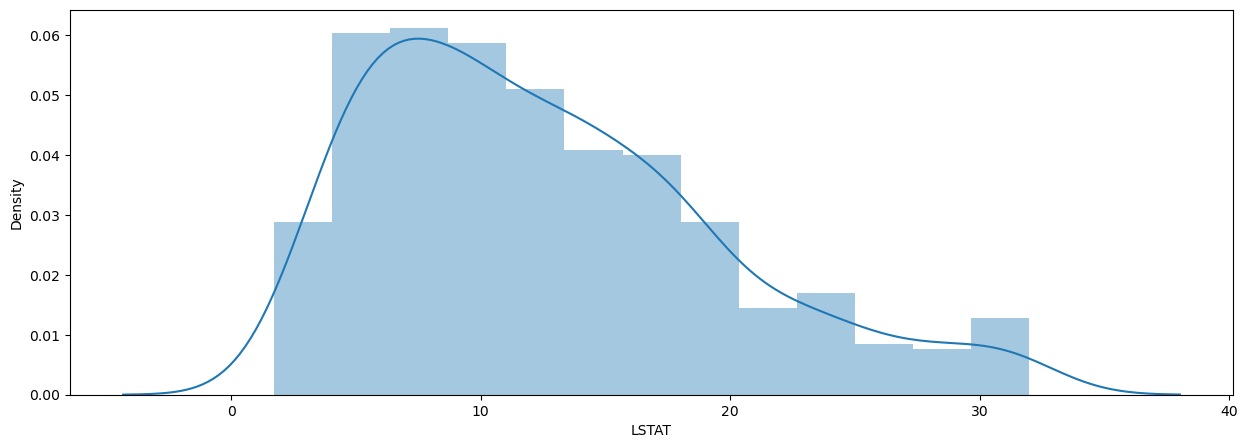

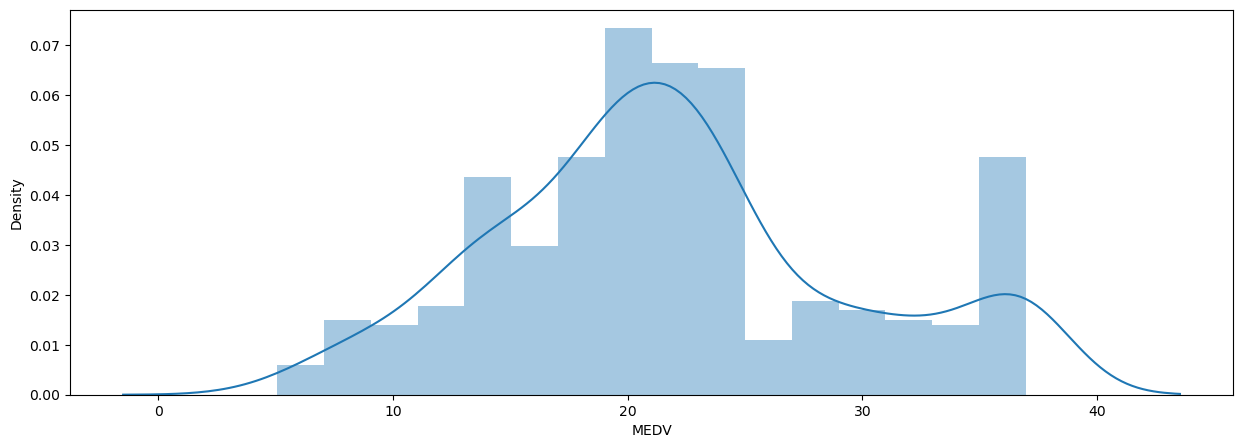

In [23]:
# After removiegn outiler visulation using the dist plot
import warnings
warnings.filterwarnings("ignore")


for col in house1.columns:
    plt.figure(figsize = (15,5))
    sns.distplot(house1[col])

In [24]:
# Compute the correlation matrix using only numeric columns
# Useful for identifying relationships and multicollinearity among features
matrix_corr = house1.corr(numeric_only=True)

In [25]:
matrix_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.370213,0.629315,-0.030748,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.538589
ZN,-0.370213,1.000000,-0.584079,-0.038059,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.428126
INDUS,0.629315,-0.584079,1.000000,0.062938,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.561174
CHAS,-0.030748,-0.038059,0.062938,1.000000,0.091203,0.081545,0.086518,-0.099435,-0.007368,-0.035587,-0.123763,-0.011069,-0.053288,0.146061
NOX,0.663412,-0.549670,0.763651,0.091203,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.506505
RM,-0.260057,0.357439,-0.408704,0.081545,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.697645
AGE,0.518951,-0.583149,0.644779,0.086518,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.458662
DIS,-0.555054,0.681019,-0.713079,-0.099435,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.333079
RAD,0.926977,-0.344043,0.595129,-0.007368,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.452679
TAX,0.870686,-0.383860,0.720760,-0.035587,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.543545


<Axes: >

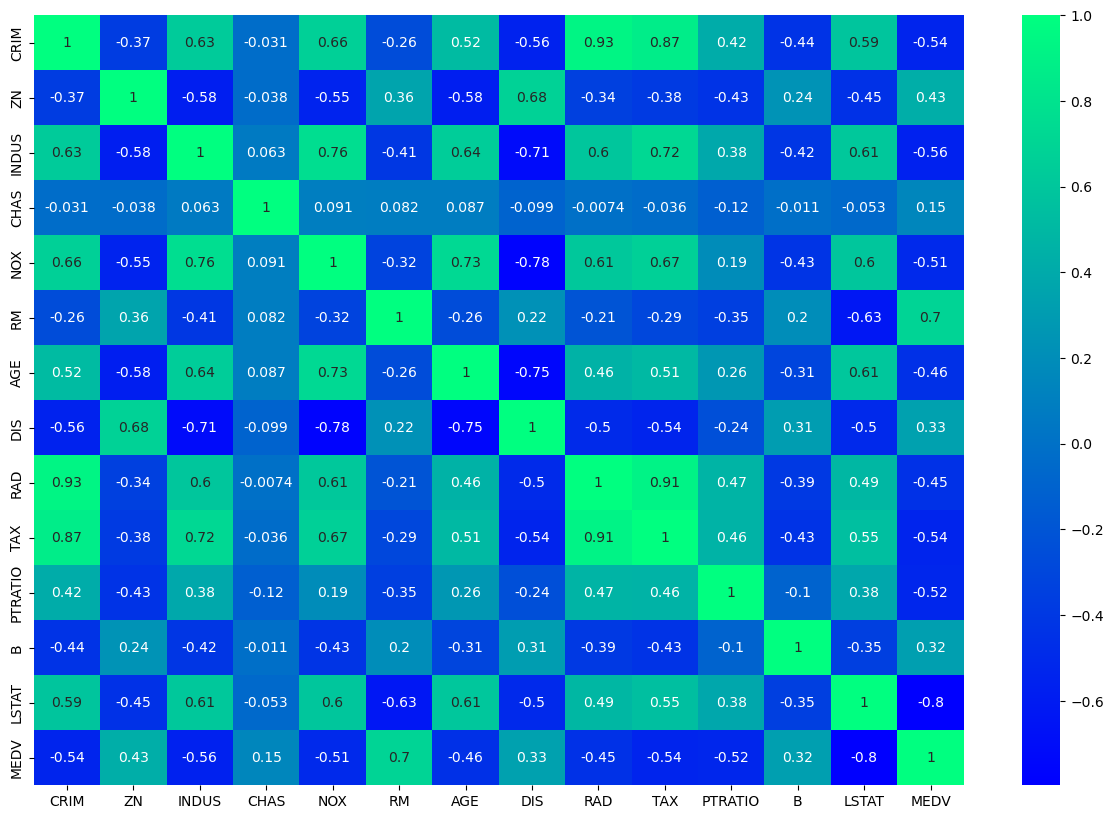

In [26]:
# Set the size of the plot to ensure readability of annotations and labels
plt.figure(figsize=(15, 10))

# Plot the heatmap of the correlation matrix
# 'annot=True' displays the correlation coefficients in each cell
# 'cmap="winter"' applies a cool color gradient to visualize strength of correlation
sns.heatmap(matrix_corr, annot=True, cmap="winter")

In [27]:
# Training test spliting

x_train,x_test,y_train,y_test = train_test_split(house1.iloc[:,0:13],house1.iloc[:,-1],test_size=0.3,random_state=42)

In [28]:
pip = ColumnTransformer(
    transformers=[
        # Apply log(1 + x) transformation to columns 0, 1, 2, 4, 7, 9, 12
        ("log1p", FunctionTransformer(np.log1p), [0, 1, 2, 4, 7, 9, 12]),

        # Apply Box-Cox power transformation to columns 5, 6, 10, 11
        # Note: Box-Cox requires strictly positive data
        ("yeojohnson", PowerTransformer(method="box-cox"), [5, 6, 10, 11]),

        # Standardize columns 0, 1, 2, 4, 7, 9, 12 by removing the mean and scaling to unit variance
        ("scaler", StandardScaler(), [0, 1, 2, 4, 7, 9, 12])
    ],
    # Leave all other columns untouched (passthrough)
    remainder="passthrough"
)


In [29]:
# Define a function to train and evaluate a regression model using a pipeline
def model3(name_model):
    # Instantiate the model class passed as argument (e.g., LinearRegression, RandomForestRegressor, etc.)
    cf = name_model()

    # Create a pipeline that first applies preprocessing (pip) then fits the model (cf)
    pip1 = Pipeline([
        ("preprocessing", pip),  # Data preprocessing steps (scaling, transformations)
        ("model", cf)            # The regression model to train
    ])
    
    # Fit the pipeline on the training data
    pip1.fit(x_train, y_train)
    
    # Predict target values for the test data
    y_pred = pip1.predict(x_test)

    # Print the results summary for the given model
    print(f"\n🔍 Results for {name_model.__name__}:")
    
    # Mean Squared Error (MSE): average squared difference between actual and predicted values
    print("mean squared error:", mean_squared_error(y_test, y_pred))
    
    # Mean Absolute Error (MAE): average absolute difference between actual and predicted values
    # **Note:** You mistakenly printed MSE again here; should use mean_absolute_error instead
    print("mean absolute error:", mean_absolute_error(y_test, y_pred))
    
    # Root Mean Squared Error (RMSE): square root of MSE, gives error in original units
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    
    # R-squared score: proportion of variance explained by the model (closer to 1 is better)
    print("r2_score:", r2_score(y_test, y_pred))
    
    # Adjusted R-squared: adjusted for the number of predictors to avoid overfitting bias
    # Formula: 1 - (1-R2)*(n-1)/(n-p-1)
    # where n = number of samples (152 here), p = number of predictors (13 here)
    print("adjusted r2:", 1 - (1 - r2_score(y_test, y_pred)) * (152 - 1) / (152 - 13 - 1))

In [30]:
name = [LinearRegression,Ridge,Lasso]
for al in name:
    model3(al)


🔍 Results for LinearRegression:
mean squared error: 9.88271827843529
mean absolute error: 2.2714670797350522
RMSE: 3.1436790991504346
r2_score: 0.8068902034984844
adjusted r2: 0.788698700929501

🔍 Results for Ridge:
mean squared error: 9.975483774165909
mean absolute error: 2.278818396484907
RMSE: 3.1583989257479663
r2_score: 0.8050775518070978
adjusted r2: 0.786715292194723

🔍 Results for Lasso:
mean squared error: 17.289567649918496
mean absolute error: 3.3312769079454805
RMSE: 4.158072588341682
r2_score: 0.6621592565518754
adjusted r2: 0.6303336792705303


In [31]:
def model4(name_model, alpha):
    # Apply polynomial feature expansion to increase feature complexity
    poly = PolynomialFeatures(degree=2)  # degree=2 creates squared and interaction terms
    
    # Fit polynomial features on training data and transform it
    x_train_trf = poly.fit_transform(x_train)
    # Transform test data with the same polynomial features
    x_test_trf = poly.transform(x_test)

    # Instantiate the regression model with regularization parameter alpha
    # For example, Ridge(alpha=...) or Lasso(alpha=...)
    cf1 = name_model(alpha)

    # Create a pipeline with only the model since data is already transformed
    pip2 = Pipeline([
        ("model", cf1)
    ])

    # Fit the model pipeline on the transformed training data
    pip2.fit(x_train_trf, y_train)

    # Predict on the transformed test data
    y_pred = pip2.predict(x_test_trf)

    # Print performance metrics for this model and alpha value
    print(f"\n🔍 Results for {name_model.__name__} with alpha={alpha}:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))        # Average squared prediction error
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))      # Average absolute prediction error
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))            # Root of MSE for error in original units
    print("R² Score:", r2_score(y_test, y_pred))                            # Variance explained by the model
    
    # Adjusted R² accounts for number of features and samples to penalize overfitting
    n = len(y_test)            # Number of test samples
    p = x_test.shape[1]        # Number of original features (before polynomial transform)
    adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1)
    print("Adjusted R²:", adjusted_r2)


In [32]:
import warnings
warnings.filterwarnings("ignore")
nn = [Ridge,Lasso]
for alg in nn:
    model4(alg,0.003)


🔍 Results for Ridge with alpha=0.003:
Mean Squared Error: 11.551491691215816
Mean Absolute Error: 2.3119822343818597
RMSE: 3.398748547806356
R² Score: 0.7742821208768871
Adjusted R²: 0.7530188424087678

🔍 Results for Lasso with alpha=0.003:
Mean Squared Error: 10.310620818956702
Mean Absolute Error: 2.203880107114041
RMSE: 3.2110155432443332
R² Score: 0.7985289237175075
Adjusted R²: 0.7795497643575625


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to train and evaluate a regression model using preprocessing pipeline
def model3(name_model):
    # Instantiate the model (e.g., RandomForestRegressor(), LinearRegression(), etc.)
    cf = name_model()

    # Create a pipeline with preprocessing steps followed by the model
    pip1 = Pipeline([
        ("preprocessing", pip),  # 'pip' should be your ColumnTransformer or similar
        ("model", cf)
    ])
    
    # Fit the pipeline on the training data
    pip1.fit(x_train, y_train)
    
    # Predict target values for the test data
    y_pred = pip1.predict(x_test)
    
    # Print evaluation metrics
    print(f"\n🔍 Results for {name_model.__name__}:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))             # Average squared difference between actual and predicted
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))           # Average absolute difference between actual and predicted
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE, error in original units
    print("R² Score:", r2_score(y_test, y_pred))                                 # Proportion of variance explained by the model
    
    # Adjusted R² accounts for number of predictors to avoid overfitting bias
    # 152 = number of samples, 13 = number of features; you may want to adjust dynamically
    n = 152
    p = 13
    adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1)
    print("Adjusted R²:", adjusted_r2)


In [34]:
model3(RandomForestRegressor)


🔍 Results for RandomForestRegressor:
Mean Squared Error: 7.5076826466899735
Mean Absolute Error: 1.9346636513157875
Root Mean Squared Error: 2.740015081471263
R² Score: 0.8532987557417446
Adjusted R²: 0.8394790733116191
